In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

import os #

from itertools import combinations
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from networkx.algorithms import community
from scipy.spatial.distance import euclidean, pdist, squareform
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
# a = pd.read_csv("../Files/Glassdoor_Salary_Cleaned_Version.csv") # QF632_Project_1 jobs_in_data QF632_Project_2_b.csv QF632_Project_2_c.csv Glassdoor_Salary_Cleaned_Version
df = pd.read_csv("Analyst_Coverage.csv")
df

ANALYST       DATE BROKER  RATING RECOMMENDATION  TARGET_PRICE  \
0     Jamrgett   3/5/2020  Beerg     5.0            buy  1.220000e+02   
1     Joneeney   3/3/2020  Corch     3.0    equalweight  1.050000e+02   
2     MarDeboo   3/2/2020  Jeies     3.0           hold  1.050000e+02   
3     Niclberg   3/1/2020  Lirum     3.0           hold  1.070000e+02   
4     Antpagna  2/27/2020  ISEVA     5.0     overweight -2.420000e-14   
...        ...        ...    ...     ...            ...           ...   
8671  Inghmidt   4/7/2016  Hasse     1.0           sell -2.420000e-14   
8672  Xavaroen   3/9/2018  Br Co     3.0        neutral  8.800000e+01   
8673  FraMaury   4/4/2016  OdBHF     2.0         reduce  8.900000e+01   
8674  RenWeber   2/4/2020  Ba AG     3.0           hold  5.000000e+01   
8675  Loiorvan  3/20/2017  Br Co     3.0        neutral  3.050000e+02   

            BBTICKER        GICS_SECTOR_NAME     GICS_INDUSTRY_GROUP_NAME  
0     NESN SW Equity        Consumer Staples     Food, Beverage & Tobacco  
1     NESN SW Equity        Consumer Staples     Food, Beverage & Tobacco  
2     NESN SW Equity        Consumer Staples     Food, Beverage & Tobacco  
3     NESN SW Equity        Consumer Staples     Food, Beverage & Tobacco  
4     NESN SW Equity        Consumer Staples     Food, Beverage & Tobacco  
...              ...                     ...                          ...  
8671   LHA GR Equity             Industrials               Transportation  
8672  BMW3 GR Equity  Consumer Discretionary     Automobiles & Components  
8673  BMW3 GR Equity  Consumer Discretionary     Automobiles & Components  
8674  UHRN SW Equity  Consumer Discretionary  Consumer Durables & Apparel  
8675  UHRN SW Equity  Consumer Discretionary  Consumer Durables & Apparel  

[8676 rows x 9 columns]

In [3]:
df.describe() # only rating and target_price are non categorical

RATING  TARGET_PRICE
count  8437.000000  8.676000e+03
mean      3.605310  6.778071e+02
std       1.400555  3.210461e+03
min       1.000000 -2.420000e-14
25%       3.000000  2.150000e+01
50%       3.000000  9.000000e+01
75%       5.000000  3.150000e+02
max       5.000000  1.000000e+05

In [4]:
df.head()

ANALYST       DATE BROKER  RATING RECOMMENDATION  TARGET_PRICE  \
0  Jamrgett   3/5/2020  Beerg     5.0            buy  1.220000e+02   
1  Joneeney   3/3/2020  Corch     3.0    equalweight  1.050000e+02   
2  MarDeboo   3/2/2020  Jeies     3.0           hold  1.050000e+02   
3  Niclberg   3/1/2020  Lirum     3.0           hold  1.070000e+02   
4  Antpagna  2/27/2020  ISEVA     5.0     overweight -2.420000e-14   

         BBTICKER  GICS_SECTOR_NAME  GICS_INDUSTRY_GROUP_NAME  
0  NESN SW Equity  Consumer Staples  Food, Beverage & Tobacco  
1  NESN SW Equity  Consumer Staples  Food, Beverage & Tobacco  
2  NESN SW Equity  Consumer Staples  Food, Beverage & Tobacco  
3  NESN SW Equity  Consumer Staples  Food, Beverage & Tobacco  
4  NESN SW Equity  Consumer Staples  Food, Beverage & Tobacco

In [5]:
df.tail()

ANALYST       DATE BROKER  RATING RECOMMENDATION  TARGET_PRICE  \
8671  Inghmidt   4/7/2016  Hasse     1.0           sell -2.420000e-14   
8672  Xavaroen   3/9/2018  Br Co     3.0        neutral  8.800000e+01   
8673  FraMaury   4/4/2016  OdBHF     2.0         reduce  8.900000e+01   
8674  RenWeber   2/4/2020  Ba AG     3.0           hold  5.000000e+01   
8675  Loiorvan  3/20/2017  Br Co     3.0        neutral  3.050000e+02   

            BBTICKER        GICS_SECTOR_NAME     GICS_INDUSTRY_GROUP_NAME  
8671   LHA GR Equity             Industrials               Transportation  
8672  BMW3 GR Equity  Consumer Discretionary     Automobiles & Components  
8673  BMW3 GR Equity  Consumer Discretionary     Automobiles & Components  
8674  UHRN SW Equity  Consumer Discretionary  Consumer Durables & Apparel  
8675  UHRN SW Equity  Consumer Discretionary  Consumer Durables & Apparel

In [6]:
for column in df.columns:
    print(df[column].value_counts())

Antpagna    206
Valtaldy    162
Teaerage     44
Svemeier     38
Casy Lea     36
           ... 
Andussey      1
Harnders      1
Beringer      1
Fin Ryan      1
NuaMahon      1
Name: ANALYST, Length: 2065, dtype: int64
3/5/2020      601
3/2/2020      398
3/6/2020      359
2/28/2020     350
2/27/2020     334
             ... 
1/6/2017        1
11/16/2015      1
8/16/2018       1
3/6/2014        1
3/20/2017       1
Name: DATE, Length: 491, dtype: int64
J.gan    326
Ciiti    319
Gochs    318
UBUBS    316
Moley    311
        ... 
Porse      1
Noura      1
Moson      1
SWrch      1
Burch      1
Name: BROKER, Length: 211, dtype: int64
5.0    3680
3.0    3228
1.0    1130
4.0     203
2.0     196
Name: RATING, dtype: int64
buy                     2716
hold                    1733
neutral                 1080
sell                     664
outperform               500
overweight               337
underperform             237
reduce                   196
underweight              177
add            

In [7]:
df["GICS_SECTOR_NAME"].unique()

array(['Consumer Staples', 'Health Care', 'Financials',
       'Information Technology', 'Consumer Discretionary', 'Energy',
       'Industrials', 'Utilities', 'Materials', 'Communication Services',
       'Real Estate'], dtype=object)

In [8]:
df.sort_values(by = ["RATING"])

ANALYST        DATE BROKER  RATING      RECOMMENDATION  TARGET_PRICE  \
4505  Teaerage    5/5/2016  Ah SA     1.0                sell  1.190000e+01   
2888  Olorholm   2/17/2020  ABier     1.0                sell  4.600000e+01   
7425  Ferarcia  11/27/2019  RBets     1.0        underperform  1.950000e+01   
7426  Bosguiro  11/11/2019  Grder     1.0         underweight  2.225000e+01   
6358  Antpagna   10/1/2019  ISEVA     1.0                sell -2.420000e-14   
...        ...         ...    ...     ...                 ...           ...   
8587  KazAndac    3/6/2020  Deank     NaN           not rated -2.420000e-14   
8637  Sylarker   2/26/2020  J.gan     NaN    Rating Suspended -2.420000e-14   
8642  Phihards   9/19/2018  Gochs     NaN  suspended coverage -2.420000e-14   
8643  Kriiksen    6/4/2018  SEies     NaN  suspended coverage -2.420000e-14   
8670  Micchill  10/26/2017  Chrch     NaN    no rating system  3.466000e+01   

             BBTICKER        GICS_SECTOR_NAME        GICS_INDUSTRY_GROUP_NAME  
4505   CLNX SM Equity  Communication Services      Telecommunication Services  
2888  KNEBV FH Equity             Industrials                   Capital Goods  
7425    ENG SM Equity               Utilities                       Utilities  
7426    ENG SM Equity               Utilities                       Utilities  
6358   OCDO LN Equity  Consumer Discretionary                       Retailing  
...               ...                     ...                             ...  
8587   BIRG ID Equity              Financials                           Banks  
8637    GFS LN Equity             Industrials  Commercial & Professional Serv  
8642    GFS LN Equity             Industrials  Commercial & Professional Serv  
8643    GFS LN Equity             Industrials  Commercial & Professional Serv  
8670    LHA GR Equity             Industrials                  Transportation  

[8676 rows x 9 columns]

In [9]:
df["ANALYST"].value_counts()

Antpagna    206
Valtaldy    162
Teaerage     44
Svemeier     38
Casy Lea     36
           ... 
Andussey      1
Harnders      1
Beringer      1
Fin Ryan      1
NuaMahon      1
Name: ANALYST, Length: 2065, dtype: int64

In [10]:
df["RATING"].value_counts()

5.0    3680
3.0    3228
1.0    1130
4.0     203
2.0     196
Name: RATING, dtype: int64

In [11]:
df["RATING"].isna().sum()

239

We don’t usually like to depend on standard company classification methodologies – based on the following data frame of analyst coverage of companies, we would like to pursue a recategorization of companies based on exactly this - analyst co-coverage. Note some columns are redundant/not needed.
1. Which company has the higher analyst coverage? (Look at histogram)
2. Which analyst covers the most companies? (Look at histogram)
3. Based on how analysts organize themselves into covering companies,
a. Could you model the similarity or conversely, the distance matrix between the companies based on this analyst co-coverage
b. How would the results change if you were to restrict the dataset to only analysts having companies covered within 1s.d. of the distribution found in Qn. 2?
c. If further restricted to a smaller subset?
4. Which sectors are the most heterogenous? (Look at the clusters formed
by industry groups per sector – use t-SNE to visualize)
5. Similarly, which sectors are the most homogenous?
6. What type of companies tend to be outliers in terms of the clusters?
7. Feel free to explore and provide deeper insights in the structure of the
clusters/network as part of the outputs.

# 1. Which company has the higher analyst coverage? (Look at histogram)

In [12]:
df.groupby('BBTICKER').size().sort_values(ascending=False)

BBTICKER
ADS GR Equity      44
SAP GR Equity      42
ASML NA Equity     41
AZN LN Equity      40
MC FP Equity       38
                   ..
HEIO NA Equity      5
RYAAY US Equity     5
RO SW Equity        3
UHRN SW Equity      2
BMW3 GR Equity      2
Length: 360, dtype: int64

In [13]:
df.groupby('BBTICKER')['ANALYST'].nunique().sort_values(ascending=False)

BBTICKER
ADS GR Equity      44
SAP GR Equity      42
ASML NA Equity     41
AZN LN Equity      40
MC FP Equity       38
                   ..
HEIO NA Equity      5
RYAAY US Equity     5
RO SW Equity        3
BMW3 GR Equity      2
UHRN SW Equity      2
Name: ANALYST, Length: 360, dtype: int64

In [14]:
coverage_count = df['BBTICKER'].value_counts()
coverage_count

ADS GR Equity      44
SAP GR Equity      42
ASML NA Equity     41
AZN LN Equity      40
MC FP Equity       38
                   ..
HEIO NA Equity      5
RYAAY US Equity     5
RO SW Equity        3
BMW3 GR Equity      2
UHRN SW Equity      2
Name: BBTICKER, Length: 360, dtype: int64

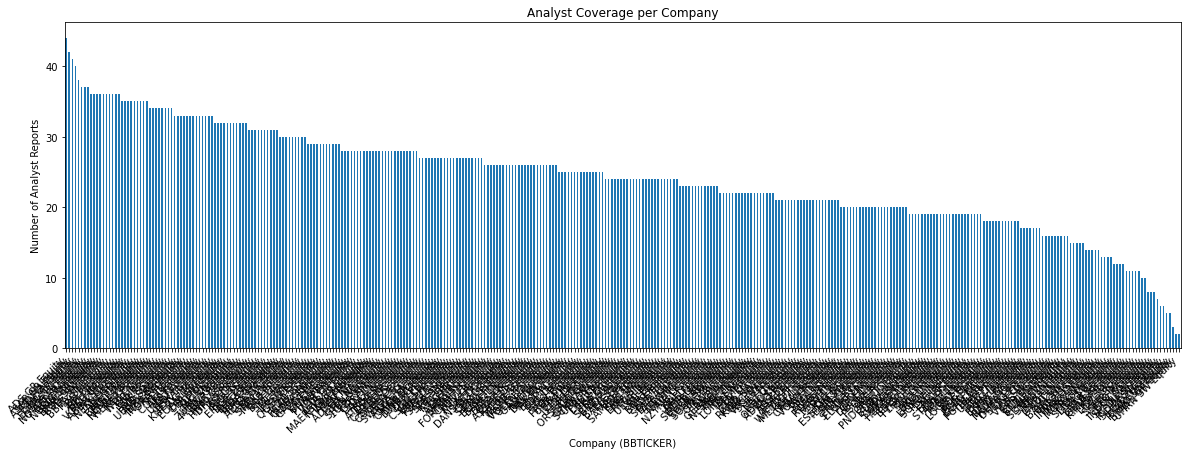

In [15]:
plt.figure(figsize=(20, 6))
coverage_count.plot(kind='bar')
plt.title('Analyst Coverage per Company')
plt.xlabel('Company (BBTICKER)')
plt.ylabel('Number of Analyst Reports')
plt.xticks(rotation=45, ha="right")
plt.show()

In [16]:
# # same result as above

# plt.figure(figsize=(20, 6))
# df.groupby('BBTICKER').size().sort_values(ascending=False).plot(kind='bar')
# plt.title('Analyst Coverage per Company')
# plt.xlabel('Company (BBTICKER)')
# plt.ylabel('Number of Analyst Reports')
# plt.xticks(rotation=45, ha="right")
# plt.show()

In [17]:
# # same result as above

# plt.figure(figsize=(20, 6))
# df.groupby('BBTICKER')['ANALYST'].nunique().sort_values(ascending=False).plot(kind='bar')
# plt.title('Analyst Coverage per Company')
# plt.xlabel('Company (BBTICKER)')
# plt.ylabel('Number of Analyst Reports')
# plt.xticks(rotation=45, ha="right")
# plt.show()

## Top 88 companies with highest analyst coverage

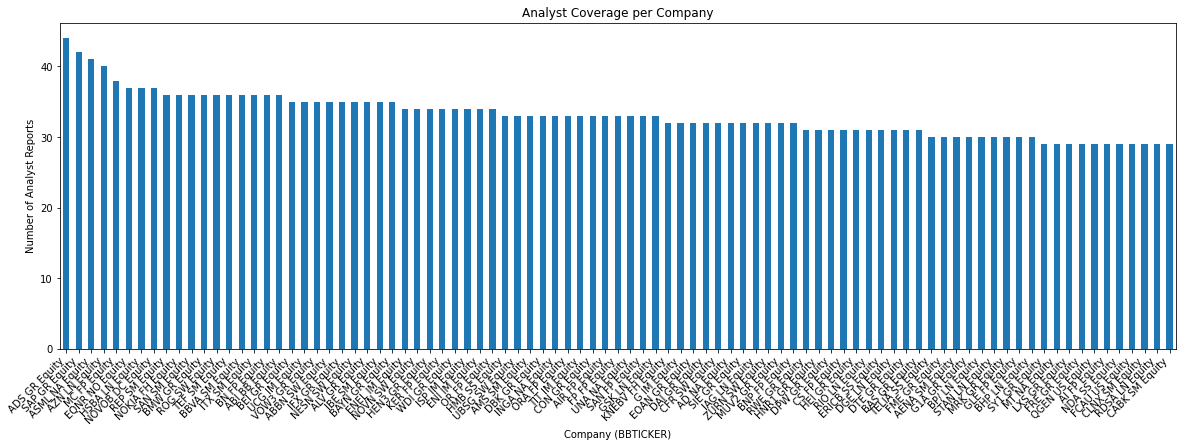

In [18]:
plt.figure(figsize=(20, 6))
coverage_count[:89].plot(kind='bar')
plt.title('Analyst Coverage per Company')
plt.xlabel('Company (BBTICKER)')
plt.ylabel('Number of Analyst Reports')
plt.xticks(rotation=45, ha="right")
plt.show()

## Bottom 88 companies with highest analyst coverage

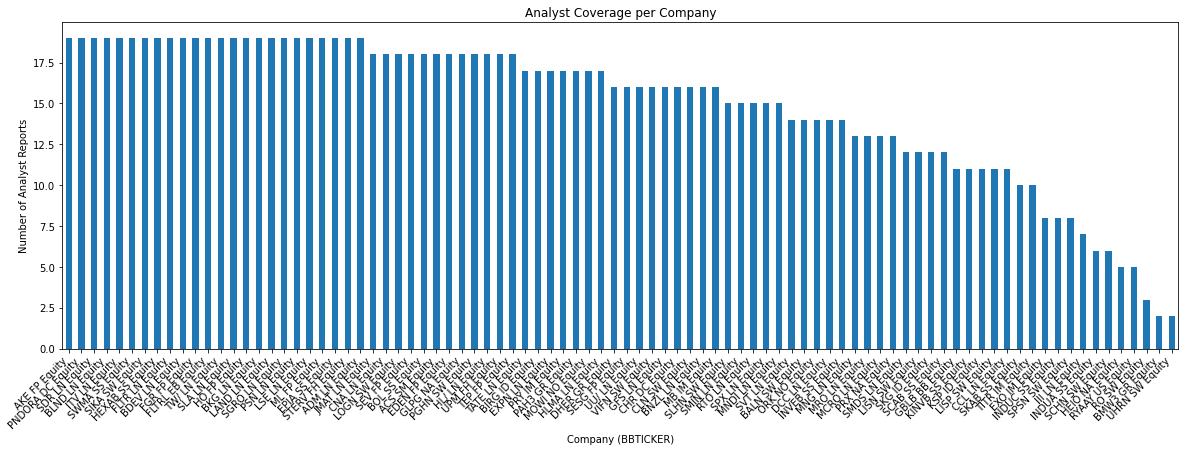

In [19]:
plt.figure(figsize=(20, 6))
coverage_count[-88:].plot(kind='bar')
plt.title('Analyst Coverage per Company')
plt.xlabel('Company (BBTICKER)')
plt.ylabel('Number of Analyst Reports')
plt.xticks(rotation=45, ha="right")
plt.show()

# 2. Which analyst covers the most companies? (Look at histogram)

In [20]:
analyst_coverage = df.groupby('ANALYST')['BBTICKER'].nunique().sort_values(ascending=False)
analyst_coverage

ANALYST
Antpagna    206
Valtaldy    162
Teaerage     42
Svemeier     38
Casy Lea     36
           ... 
Aymarodi      1
Mat Liss      1
MatYoung      1
Matdberg      1
Jos Beck      1
Name: BBTICKER, Length: 2065, dtype: int64

In [21]:
analyst_coverage[0]

206

In [22]:
analyst_coverage.index[0]

'Antpagna'

## Top 10 Analysts with most coverage

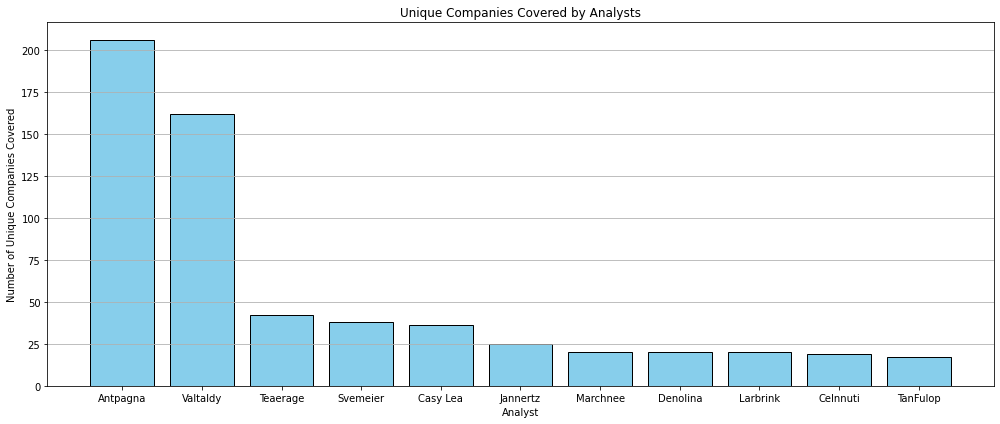

In [23]:
plt.figure(figsize=(14, 6))
plt.bar(analyst_coverage[:11].index, analyst_coverage[:11], color='skyblue', edgecolor='black')
plt.title('Unique Companies Covered by Analysts')
plt.xlabel('Analyst')
plt.ylabel('Number of Unique Companies Covered')
plt.xticks(rotation=0)  # Rotate the x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Last 10 Analysts with most coverage

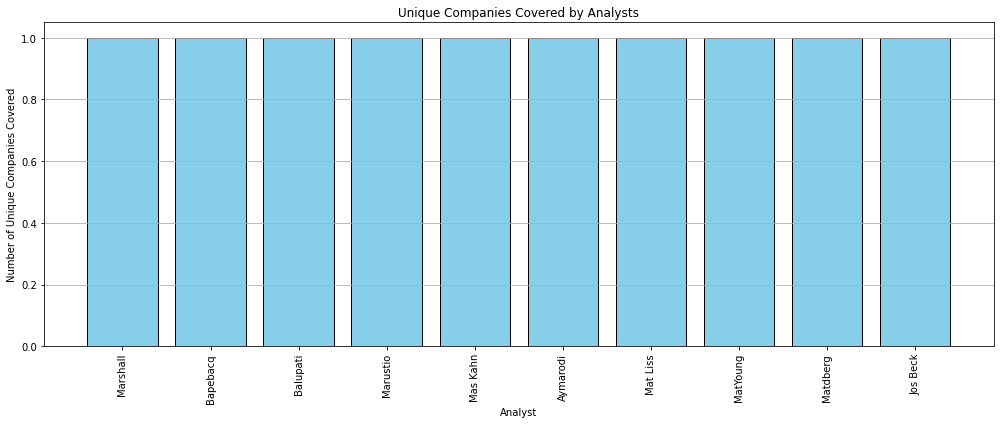

In [24]:
plt.figure(figsize=(14, 6))
plt.bar(analyst_coverage[-10:].index, analyst_coverage[-10:], color='skyblue', edgecolor='black')
plt.title('Unique Companies Covered by Analysts')
plt.xlabel('Analyst')
plt.ylabel('Number of Unique Companies Covered')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Based on how analysts organize themselves into covering companies, 

# a. Could you model the similarity or conversely, the distance matrix between the companies based on this analyst co-coverage

## Jaccard similarity matrix

In [25]:
# Grouping by ANALYST and creating a binary matrix of analyst co-coverage
analyst_coverage_matrix = df.groupby(['ANALYST', 'BBTICKER']).size().unstack().notnull().astype(int)

# Calculating Jaccard similarity or distance between each pair of companies
companies = analyst_coverage_matrix.columns
company_pairs = list(combinations(companies, 2))
company_similarities = {}

for company1, company2 in company_pairs:
    coverage1 = analyst_coverage_matrix[company1]
    coverage2 = analyst_coverage_matrix[company2]
    similarity = jaccard_score(coverage1, coverage2)
    company_similarities[(company1, company2)] = similarity

# Creating a similarity matrix
similarity_matrix = pd.DataFrame(index=companies, columns=companies)
for (company1, company2), similarity in company_similarities.items():
    similarity_matrix.loc[company1, company2] = similarity
    similarity_matrix.loc[company2, company1] = similarity

# Displaying the similarity matrix
print("Similarity Matrix:")
print(similarity_matrix)

Similarity Matrix:
BBTICKER        1COV GR Equity AAL LN Equity ABBN SW Equity ABF LN Equity  \
BBTICKER                                                                    
1COV GR Equity             NaN      0.018182            0.0      0.018868   
AAL LN Equity         0.018182           NaN       0.032787      0.018868   
ABBN SW Equity             0.0      0.032787            NaN      0.016667   
ABF LN Equity         0.018868      0.018868       0.016667           NaN   
ABI BB Equity         0.015873      0.015873       0.014286      0.033333   
...                        ...           ...            ...           ...   
WPP LN Equity              0.0      0.018182       0.016129      0.018868   
WRT1V FH Equity       0.020833           0.0       0.076923      0.021739   
WTB LN Equity         0.018182      0.018182       0.016129      0.038462   
YAR NO Equity         0.104167           0.0            0.0          0.02   
ZURN SW Equity             0.0      0.016949       0.0151

# Heatmap

In [26]:
# reset analyst_coverage_matrix 

# Grouping by ANALYST and creating a binary matrix of analyst co-coverage
analyst_coverage_matrix = df.groupby(['ANALYST', 'BBTICKER']).size().unstack().notnull().astype(int)

# Calculating cosine similarity between each pair of companies
cosine_similarities = cosine_similarity(analyst_coverage_matrix.T)

# Calculating Euclidean distance between each pair of companies
euclidean_distances = euclidean_distances(analyst_coverage_matrix.T)

# Creating similarity and distance matrices
companies = analyst_coverage_matrix.columns
cosine_similarity_matrix = pd.DataFrame(cosine_similarities, index=companies, columns=companies)
euclidean_distance_matrix = pd.DataFrame(euclidean_distances, index=companies, columns=companies)

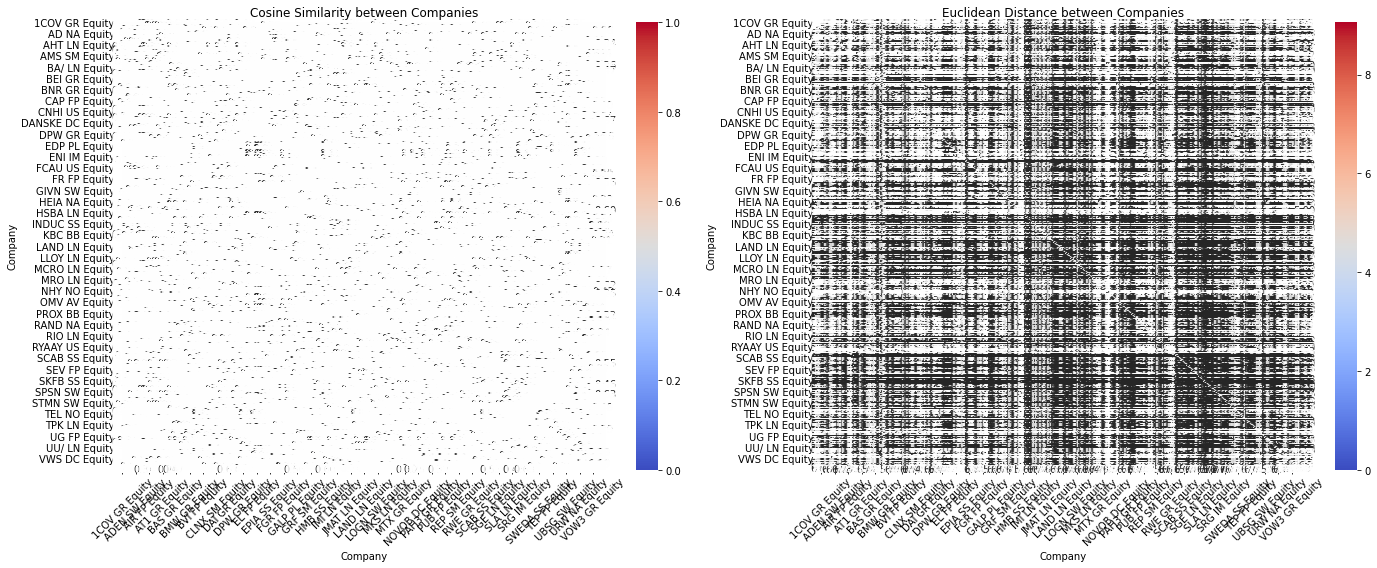

In [27]:
# Plotting the heatmaps
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Cosine Similarity
sns.heatmap(cosine_similarity_matrix, cmap="coolwarm", annot=True, fmt=".2f", ax=axes[0])
axes[0].set_title('Cosine Similarity between Companies')
axes[0].set_xlabel('Company')
axes[0].set_ylabel('Company')
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y', rotation=0)

# Euclidean Distance
sns.heatmap(euclidean_distance_matrix, cmap="coolwarm", annot=True, fmt=".2f", ax=axes[1])
axes[1].set_title('Euclidean Distance between Companies')
axes[1].set_xlabel('Company')
axes[1].set_ylabel('Company')
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

In [28]:
df[df["ANALYST"] == "Antpagna"]["BBTICKER"].nunique()

206

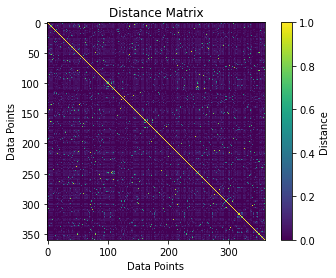

In [29]:
plt.imshow(cosine_similarity_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Distance')
plt.title('Distance Matrix')
plt.xlabel('Data Points')
plt.ylabel('Data Points')
plt.show()

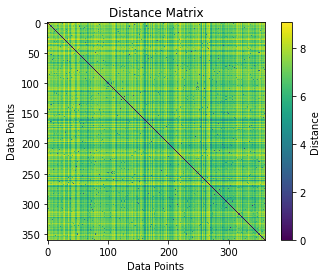

In [30]:
plt.imshow(euclidean_distance_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Distance')
plt.title('Distance Matrix')
plt.xlabel('Data Points')
plt.ylabel('Data Points')
plt.show()

# Brain network graph

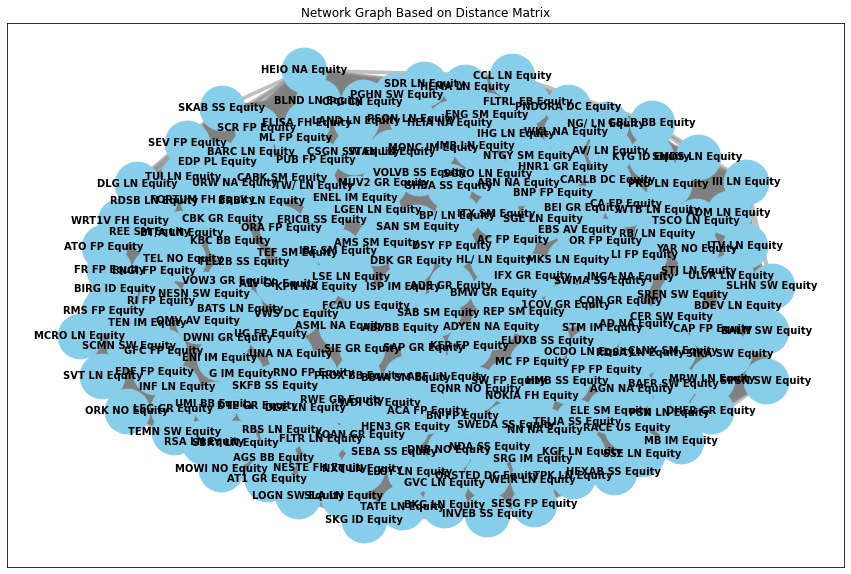

In [31]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# Grouping by ANALYST and creating a binary matrix of analyst co-coverage
analyst_coverage_matrix = df.groupby(['ANALYST', 'BBTICKER']).size().unstack().notnull().astype(int)

# Calculating cosine similarity between each pair of companies
cosine_similarities = cosine_similarity(analyst_coverage_matrix.T)

# Calculating Euclidean distance between each pair of companies
euclidean_dists = euclidean_distances(analyst_coverage_matrix.T)

# Creating similarity and distance matrices
companies = analyst_coverage_matrix.columns
cosine_similarity_matrix = pd.DataFrame(cosine_similarities, index=companies, columns=companies)
euclidean_distance_matrix = pd.DataFrame(euclidean_dists, index=companies, columns=companies)

# Filter the data for analyst 'Antpagna'
antpagna_data = df[df["ANALYST"] == "Antpagna"]

# Create a list of unique companies covered by 'Antpagna'
companies = antpagna_data["BBTICKER"].unique()

# Use Euclidean distance matrix for demonstration purposes
distance_matrix = euclidean_distance_matrix.loc[companies, companies]

# Initialize the graph
G = nx.Graph()

# Add nodes for each company
G.add_nodes_from(companies)

# Add edges with weights (distances) between the nodes
for i in range(len(companies)):
    for j in range(i+1, len(companies)):
        G.add_edge(companies[i], companies[j], weight=distance_matrix.iloc[i, j])

# Draw the graph
plt.figure(figsize=(15, 10))  # Increase the figure size for better readability

# Use spring layout for positioning nodes
pos = nx.spring_layout(G, weight='weight', k=2, iterations=50)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color="skyblue", node_size=2000)

# Draw edges with transparency based on weight
edges = nx.draw_networkx_edges(
    G, pos, 
    edge_color="gray", 
    alpha=0.5,
    width=[G[u][v]['weight'] for u,v in G.edges()]  # Width of edges based on weights
)

# Draw labels with smaller font size
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

plt.title("Network Graph Based on Distance Matrix")
plt.show()

# Scatter plot graph

In [32]:
# Grouping by ANALYST and creating a binary matrix of analyst co-coverage
analyst_coverage_matrix = df.groupby(['ANALYST', 'BBTICKER']).size().unstack().notnull().astype(int)

# Calculating cosine similarity between each pair of companies
cosine_similarities = cosine_similarity(analyst_coverage_matrix.T)

# Calculating Euclidean distance between each pair of companies
euclidean_distances = euclidean_distances(analyst_coverage_matrix.T)

# Creating similarity and distance matrices
companies = analyst_coverage_matrix.columns
cosine_similarity_matrix = pd.DataFrame(cosine_similarities, index=companies, columns=companies)
euclidean_distance_matrix = pd.DataFrame(euclidean_distances, index=companies, columns=companies)

In [33]:
euclidean_distance_matrix

BBTICKER         1COV GR Equity  AAL LN Equity  ABBN SW Equity  ABF LN Equity  \
BBTICKER                                                                        
1COV GR Equity         0.000000       7.348469        7.937254       7.211103   
AAL LN Equity          7.348469       0.000000        7.681146       7.211103   
ABBN SW Equity         7.937254       7.681146        0.000000       7.681146   
ABF LN Equity          7.211103       7.211103        7.681146       0.000000   
ABI BB Equity          7.874008       7.874008        8.306624       7.615773   
...                         ...            ...             ...            ...   
WPP LN Equity          7.483315       7.348469        7.810250       7.211103   
WRT1V FH Equity        6.855655       7.000000        6.928203       6.708204   
WTB LN Equity          7.348469       7.348469        7.810250       7.071068   
YAR NO Equity          6.557439       7.280110        7.745967       7.000000   
ZURN SW Equity         7.745967       7.615773        8.062258       7.483315   

BBTICKER         ABI BB Equity  ABN NA Equity  AC FP Equity  ACA FP Equity  \
BBTICKER                                                                     
1COV GR Equity        7.874008       7.348469      7.071068       7.280110   
AAL LN Equity         7.874008       7.348469      7.211103       7.280110   
ABBN SW Equity        8.306624       7.810250      7.681146       7.745967   
ABF LN Equity         7.615773       7.071068      6.928203       7.000000   
ABI BB Equity         0.000000       7.745967      7.615773       7.681146   
...                        ...            ...           ...            ...   
WPP LN Equity         7.874008       7.348469      7.211103       7.280110   
WRT1V FH Equity       7.416198       6.855655      6.557439       6.782330   
WTB LN Equity         7.745967       7.211103      4.242641       7.141428   
YAR NO Equity         7.681146       7.141428      6.855655       7.071068   
ZURN SW Equity        8.124038       7.615773      7.483315       7.549834   

BBTICKER         ACS SM Equity  AD NA Equity  ...  VOW3 GR Equity  \
BBTICKER                                      ...                   
1COV GR Equity        6.782330      7.615773  ...        7.681146   
AAL LN Equity         6.633250      7.615773  ...        7.681146   
ABBN SW Equity        7.141428      8.062258  ...        8.246211   
ABF LN Equity         6.480741      7.071068  ...        7.549834   
ABI BB Equity         7.211103      7.348469  ...        8.062258   
...                        ...           ...  ...             ...   
WPP LN Equity         6.633250      7.615773  ...        7.810250   
WRT1V FH Equity       6.244998      7.141428  ...        7.348469   
WTB LN Equity         6.633250      7.348469  ...        7.681146   
YAR NO Equity         6.557439      7.416198  ...        7.615773   
ZURN SW Equity        6.928203      7.874008  ...        8.062258   

BBTICKER         VWS DC Equity  WDI GR Equity  WEIR LN Equity  WKL NA Equity  \
BBTICKER                                                                       
1COV GR Equity        7.280110       7.745967        6.928203       6.855655   
AAL LN Equity         7.416198       7.874008        7.071068       6.855655   
ABBN SW Equity        7.211103       8.306624        7.280110       7.348469   
ABF LN Equity         7.141428       7.615773        6.782330       6.557439   
ABI BB Equity         7.810250       8.246211        7.483315       7.280110   
...                        ...            ...             ...            ...   
WPP LN Equity         7.416198       7.874008        7.071068       5.916080   
WRT1V FH Equity       6.633250       7.280110        5.744563       6.324555   
WTB LN Equity         7.280110       7.745967        6.928203       6.708204   
YAR NO Equity         6.928203       7.549834        6.708204       6.633250   
ZURN SW Equity        7.681146       8.000000        7.348469       7.141

In [34]:
print(euclidean_distance_matrix)

BBTICKER         1COV GR Equity  AAL LN Equity  ABBN SW Equity  ABF LN Equity  \
BBTICKER                                                                        
1COV GR Equity         0.000000       7.348469        7.937254       7.211103   
AAL LN Equity          7.348469       0.000000        7.681146       7.211103   
ABBN SW Equity         7.937254       7.681146        0.000000       7.681146   
ABF LN Equity          7.211103       7.211103        7.681146       0.000000   
ABI BB Equity          7.874008       7.874008        8.306624       7.615773   
...                         ...            ...             ...            ...   
WPP LN Equity          7.483315       7.348469        7.810250       7.211103   
WRT1V FH Equity        6.855655       7.000000        6.928203       6.708204   
WTB LN Equity          7.348469       7.348469        7.810250       7.071068   
YAR NO Equity          6.557439       7.280110        7.745967       7.000000   
ZURN SW Equity         7.745

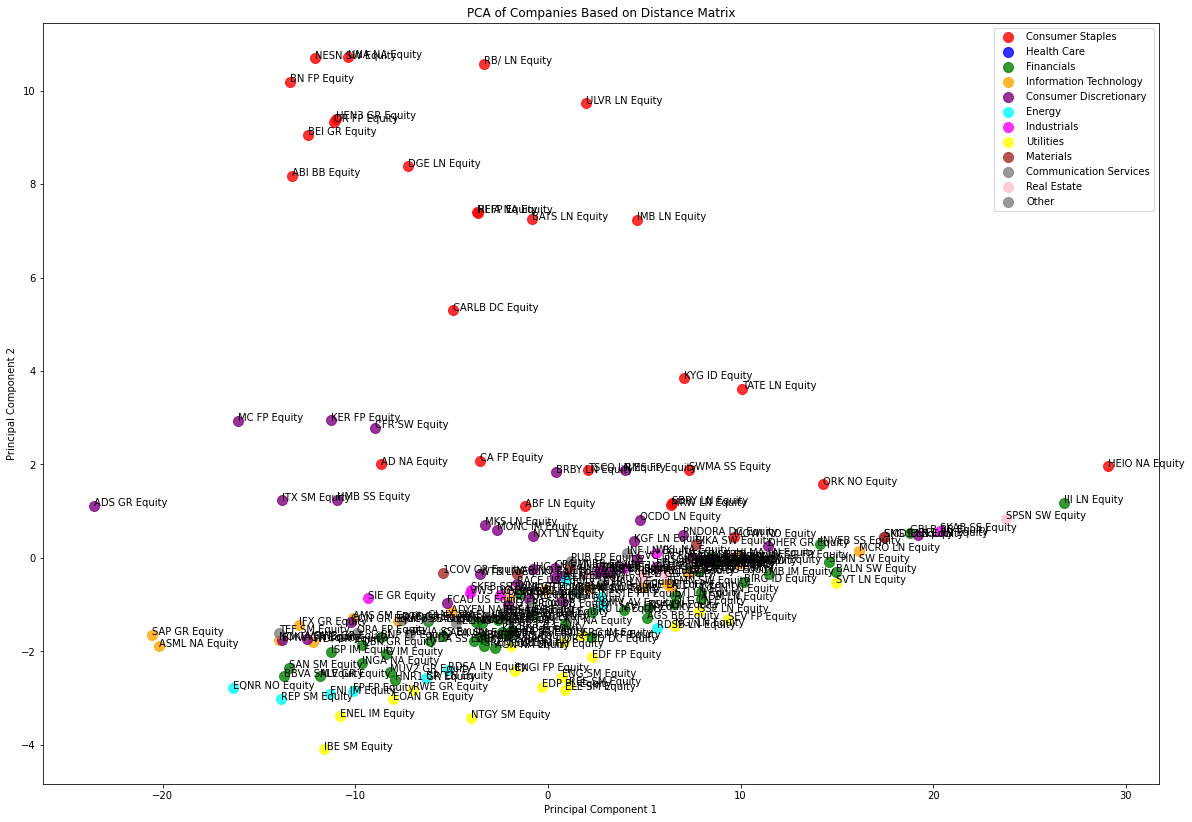

In [35]:
# Filter the data for analyst 'Antpagna'
antpagna_data = df[df["ANALYST"] == "Antpagna"]

# Create a list of unique companies covered by 'Antpagna'
companies = antpagna_data["BBTICKER"].unique()

# Subset the distance matrix to include only these companies
distance_matrix = euclidean_distance_matrix.loc[companies, companies]

# Standardize the distance matrix
scaler = StandardScaler()
distance_matrix_std = scaler.fit_transform(distance_matrix)

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(distance_matrix_std)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(pca_components, index=companies, columns=['PC1', 'PC2'])

# Mapping sector colors
sector_colors = {
    'Consumer Staples': 'red',
    'Health Care': 'blue',
    'Financials': 'green',
    'Information Technology': 'orange',
    'Consumer Discretionary': 'purple',
    'Energy': 'cyan',
    'Industrials': 'magenta',
    'Utilities': 'yellow',
    'Materials': 'brown',
    'Communication Services': 'gray',
    'Real Estate': 'pink',
    'Other': 'gray'  # additional catch-all for other sectors
}

# Assigning sector colors based on available data
pca_df['Sector'] = [df.loc[df['BBTICKER'] == company, 'GICS_SECTOR_NAME'].iloc[0] for company in companies]
pca_df['Color'] = [sector_colors.get(sector, 'gray') for sector in pca_df['Sector']]

# Plot the PCA results with colored sectors
plt.figure(figsize=(20, 14))

# Scatter plot with colored sectors
for sector, color in sector_colors.items():
    plt.scatter(pca_df.loc[pca_df['Sector'] == sector, 'PC1'],
                pca_df.loc[pca_df['Sector'] == sector, 'PC2'],
                color=color, label=sector, s=100, alpha=0.8)

# Annotate the points with company names
for i, txt in enumerate(companies):
    plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), fontsize=10)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Companies Based on Distance Matrix')
plt.legend()
plt.show()

# 3 Dimensions

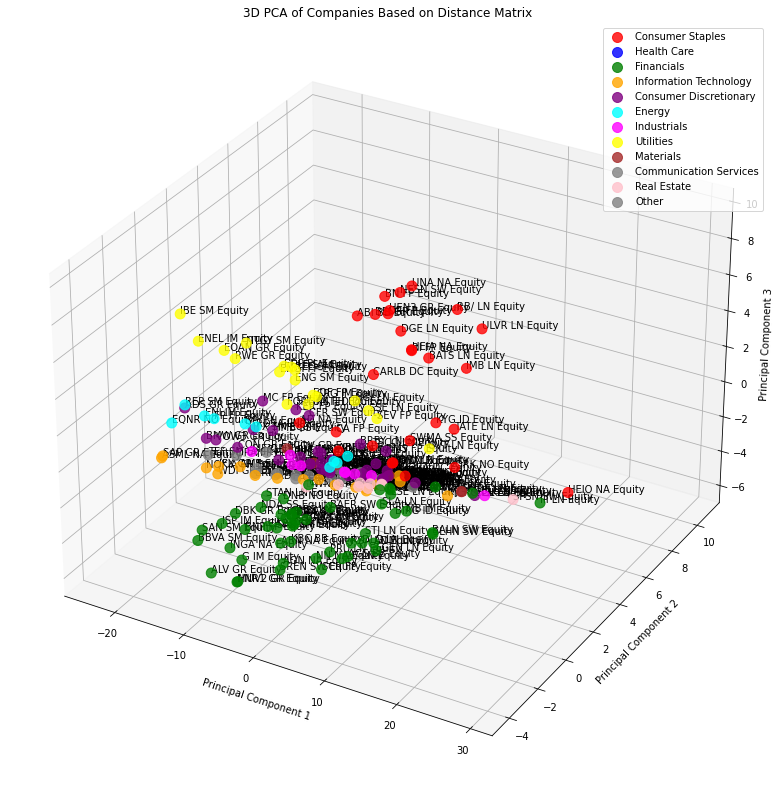

In [36]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# Grouping by ANALYST and creating a binary matrix of analyst co-coverage
analyst_coverage_matrix = df.groupby(['ANALYST', 'BBTICKER']).size().unstack().notnull().astype(int)

# Calculating cosine similarity between each pair of companies
cosine_similarities = cosine_similarity(analyst_coverage_matrix.T)

# Calculating Euclidean distance between each pair of companies
euclidean_distances = euclidean_distances(analyst_coverage_matrix.T)

# Creating similarity and distance matrices
companies = analyst_coverage_matrix.columns
cosine_similarity_matrix = pd.DataFrame(cosine_similarities, index=companies, columns=companies)
euclidean_distance_matrix = pd.DataFrame(euclidean_distances, index=companies, columns=companies)

# Filter the data for analyst 'Antpagna'
antpagna_data = df[df["ANALYST"] == "Antpagna"]

# Create a list of unique companies covered by 'Antpagna'
companies = antpagna_data["BBTICKER"].unique()

# Subset the distance matrix to include only these companies
distance_matrix = euclidean_distance_matrix.loc[companies, companies]

# Standardize the distance matrix
scaler = StandardScaler()
distance_matrix_std = scaler.fit_transform(distance_matrix)

# Apply PCA with 3 components
pca = PCA(n_components=3)
pca_components = pca.fit_transform(distance_matrix_std)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(pca_components, index=companies, columns=['PC1', 'PC2', 'PC3'])

# Mapping sector colors
sector_colors = {
    'Consumer Staples': 'red',
    'Health Care': 'blue',
    'Financials': 'green',
    'Information Technology': 'orange',
    'Consumer Discretionary': 'purple',
    'Energy': 'cyan',
    'Industrials': 'magenta',
    'Utilities': 'yellow',
    'Materials': 'brown',
    'Communication Services': 'gray',
    'Real Estate': 'pink',
    'Other': 'gray'  # additional catch-all for other sectors
}

# Assigning sector colors based on available data
pca_df['Sector'] = [df.loc[df['BBTICKER'] == company, 'GICS_SECTOR_NAME'].iloc[0] for company in companies]
pca_df['Color'] = [sector_colors.get(sector, 'gray') for sector in pca_df['Sector']]

# Plot the PCA results with colored sectors in 3D
fig = plt.figure(figsize=(20, 14))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colored sectors
for sector, color in sector_colors.items():
    sector_df = pca_df[pca_df['Sector'] == sector]
    ax.scatter(sector_df['PC1'], sector_df['PC2'], sector_df['PC3'], color=color, label=sector, s=100, alpha=0.8)

# Annotate the points with company names
for i, company in enumerate(companies):
    ax.text(pca_df['PC1'][i], pca_df['PC2'][i], pca_df['PC3'][i], company, fontsize=10)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Companies Based on Distance Matrix')
# ax.view_init(elev=30, azim=45)  # You can adjust these values as needed
ax.legend()
plt.show()

# Different angles of 3 dimensions

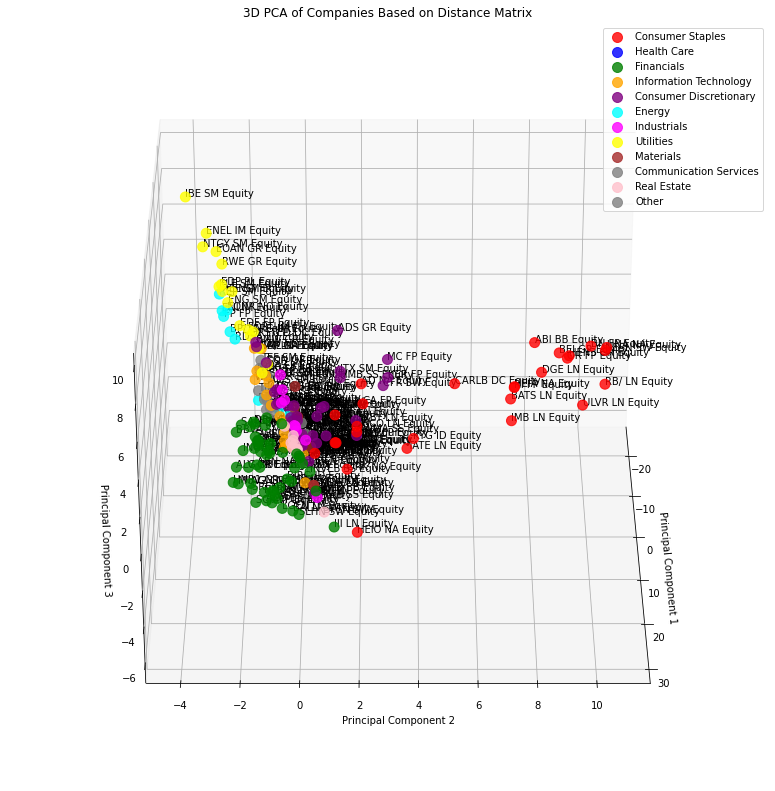

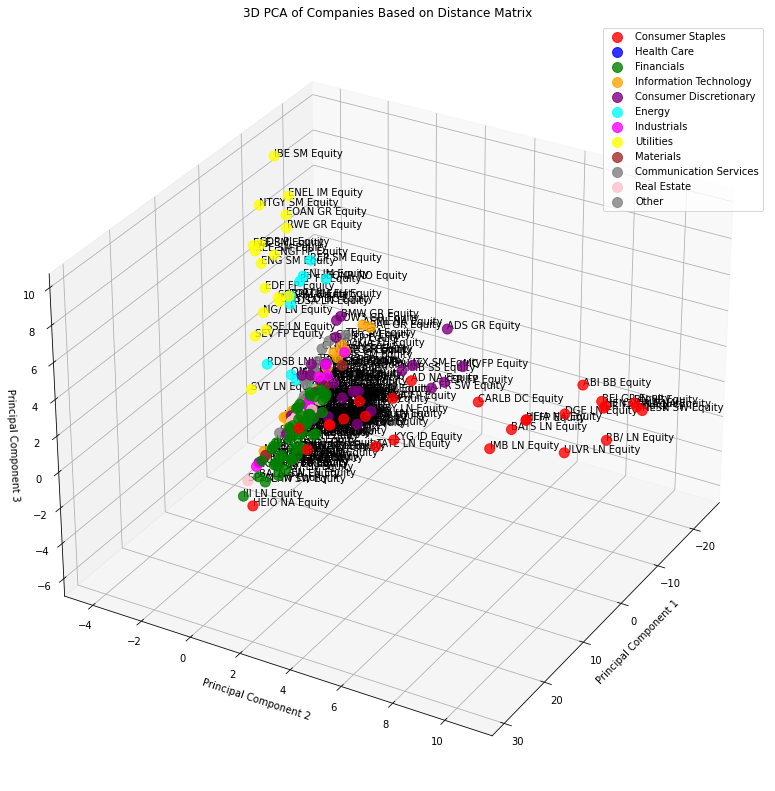

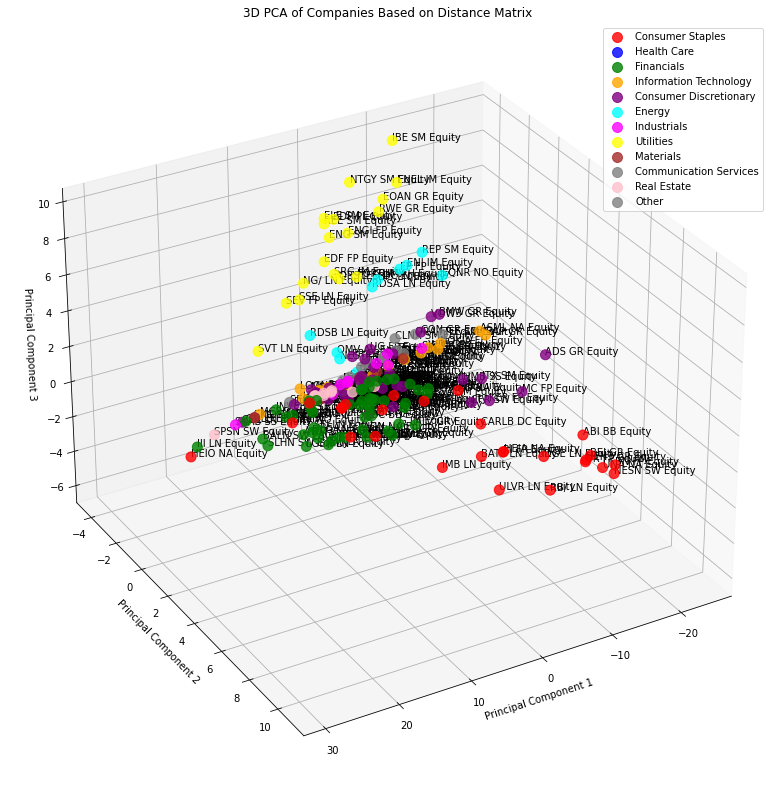

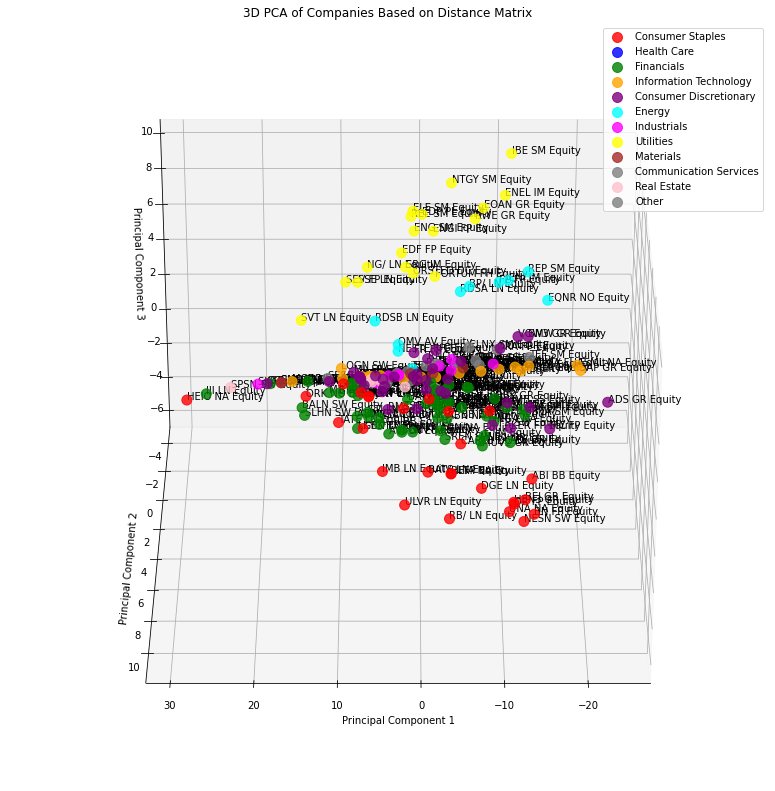

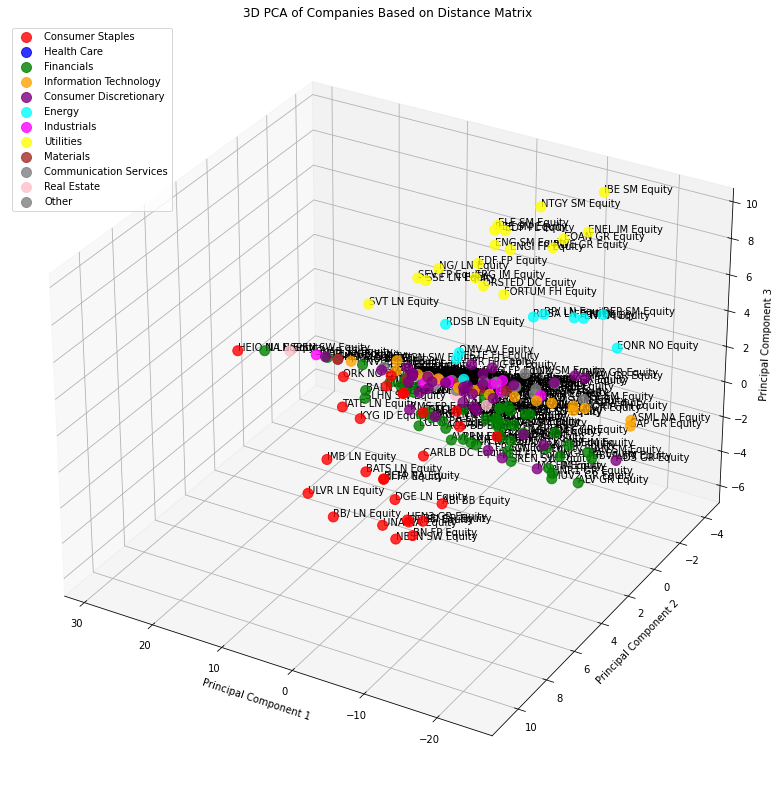

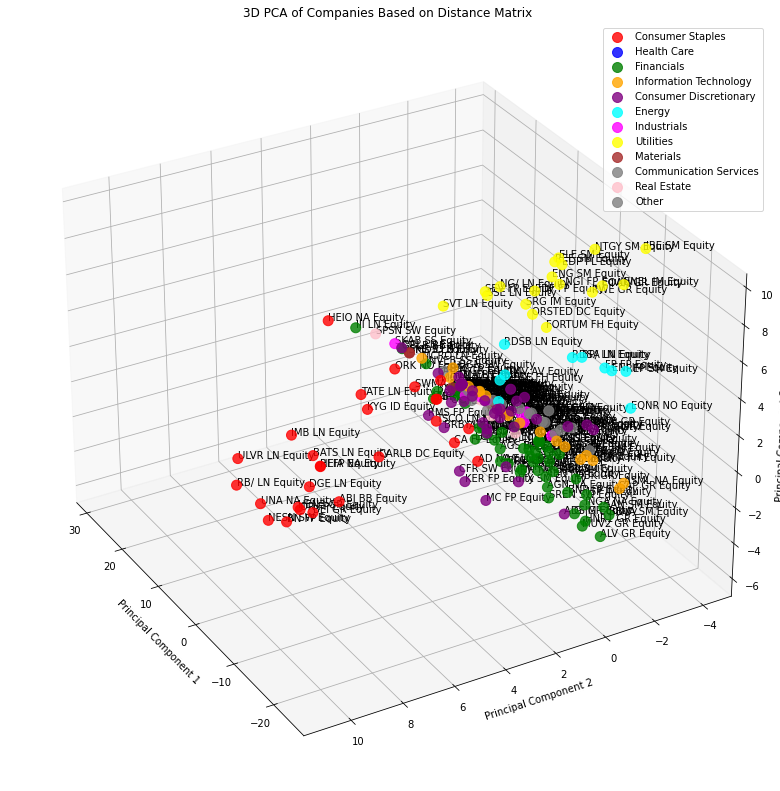

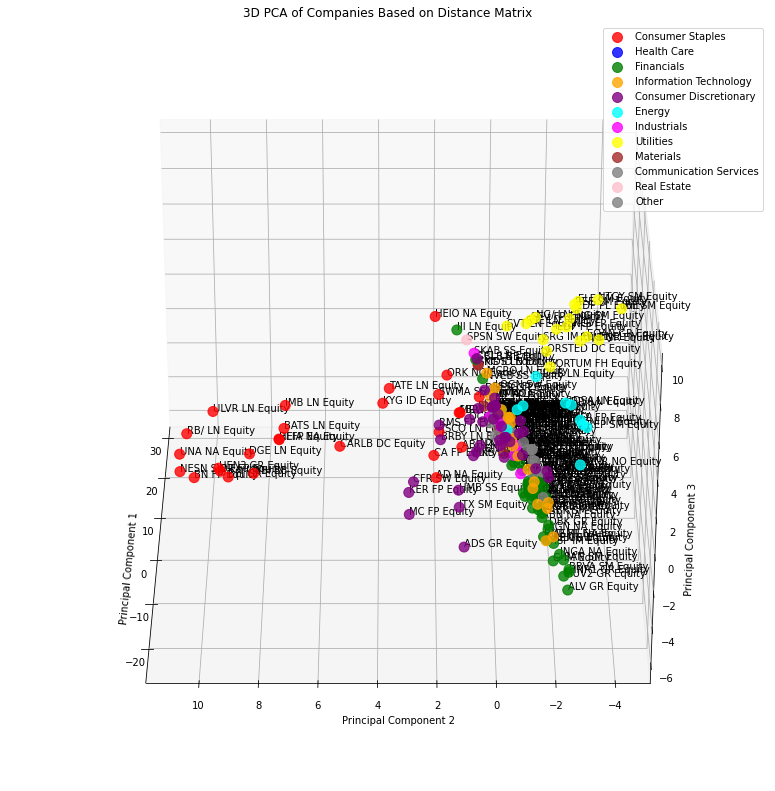

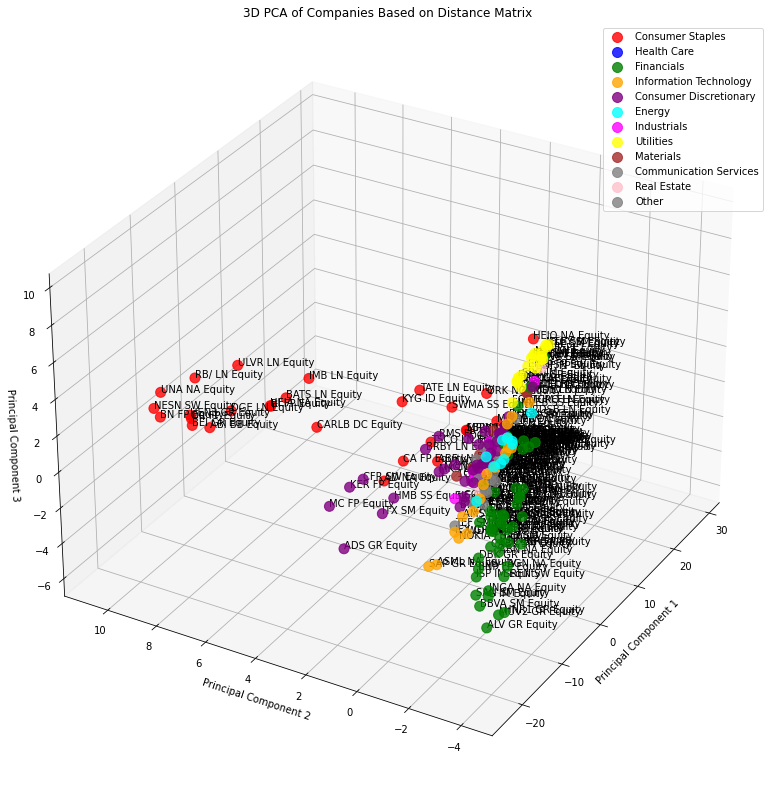

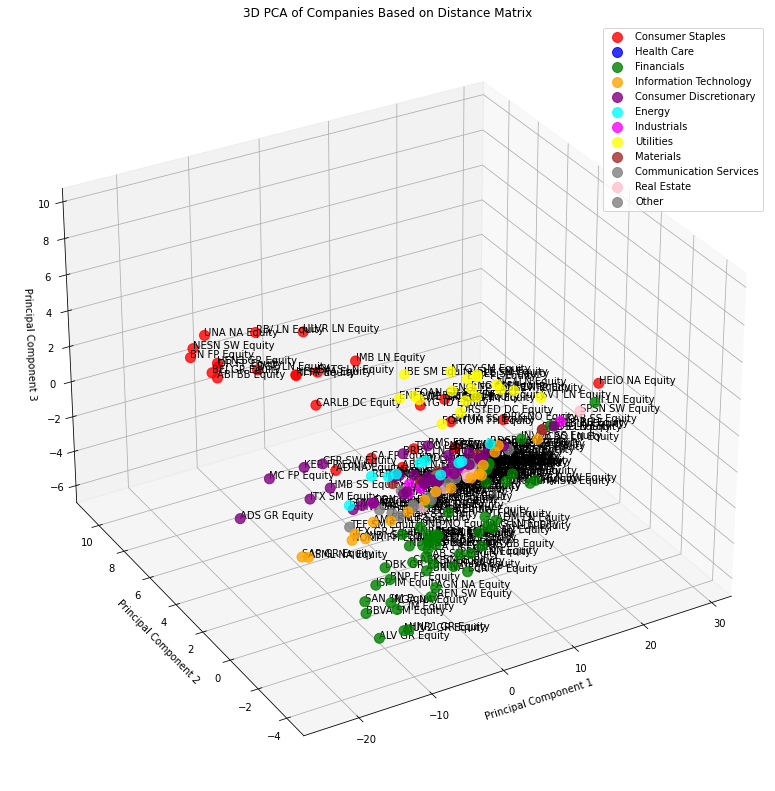

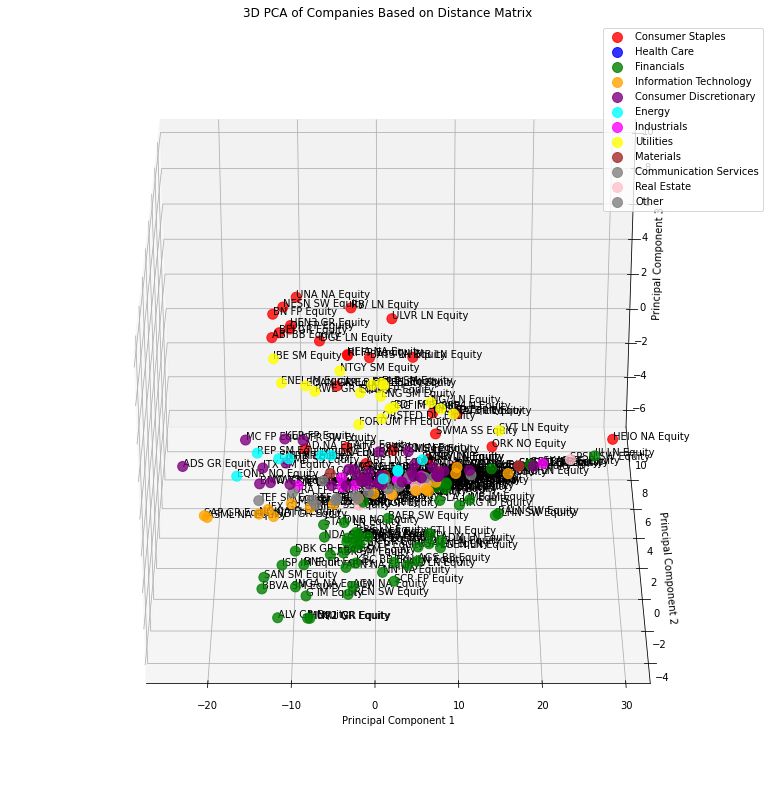

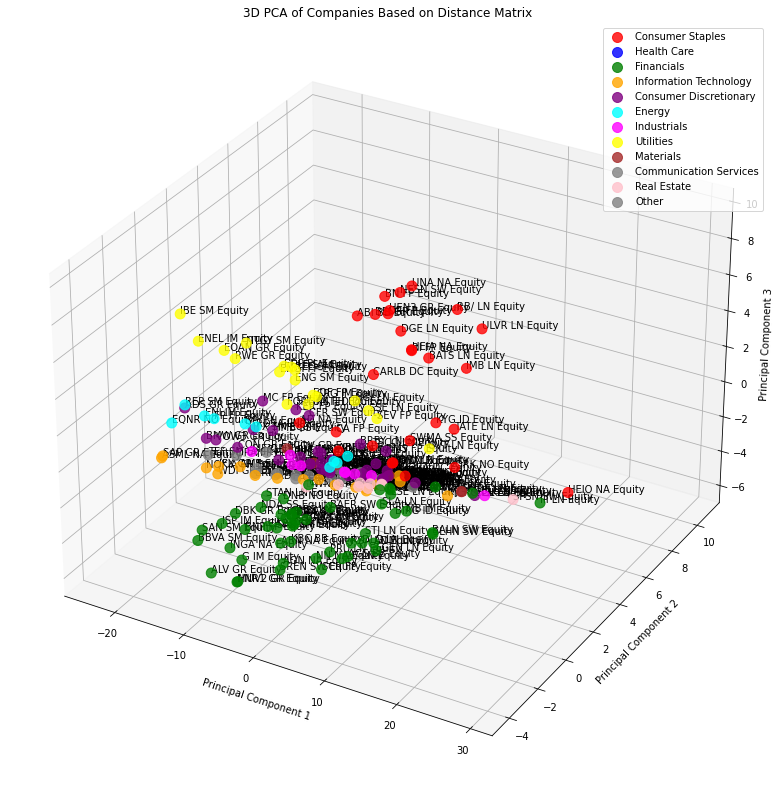

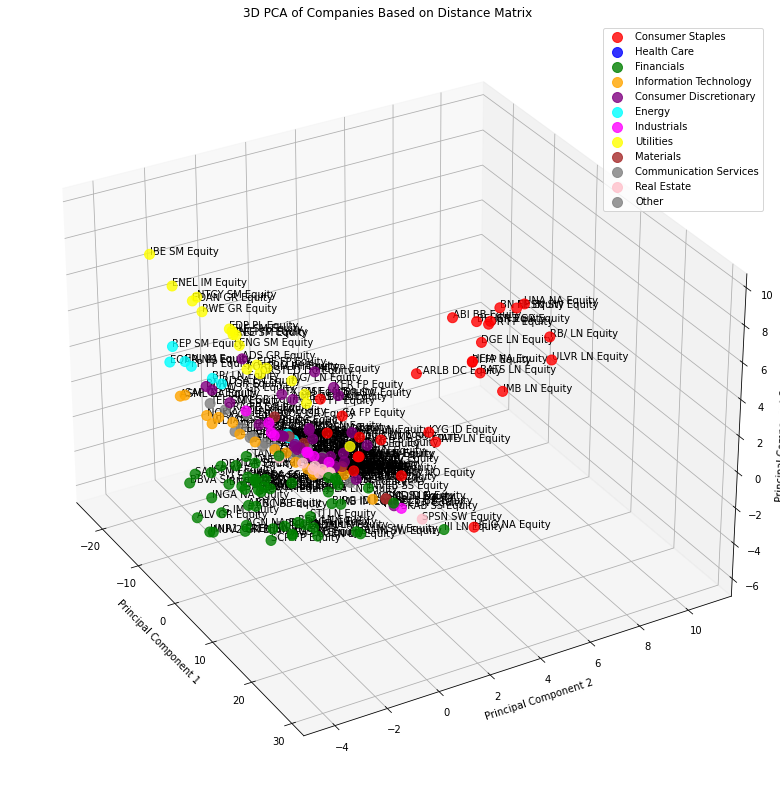

In [37]:
# Filter the data for analyst 'Antpagna'
antpagna_data = df[df["ANALYST"] == "Antpagna"]

# Create a list of unique companies covered by 'Antpagna'
companies = antpagna_data["BBTICKER"].unique()

# Subset the distance matrix to include only these companies
distance_matrix = euclidean_distance_matrix.loc[companies, companies]

# Standardize the distance matrix
scaler = StandardScaler()
distance_matrix_std = scaler.fit_transform(distance_matrix)

# Apply PCA with 3 components
pca = PCA(n_components=3)
pca_components = pca.fit_transform(distance_matrix_std)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(pca_components, index=companies, columns=['PC1', 'PC2', 'PC3'])

# Mapping sector colors
sector_colors = {
    'Consumer Staples': 'red',
    'Health Care': 'blue',
    'Financials': 'green',
    'Information Technology': 'orange',
    'Consumer Discretionary': 'purple',
    'Energy': 'cyan',
    'Industrials': 'magenta',
    'Utilities': 'yellow',
    'Materials': 'brown',
    'Communication Services': 'gray',
    'Real Estate': 'pink',
    'Other': 'gray'  # additional catch-all for other sectors
}

# Assigning sector colors based on available data
pca_df['Sector'] = [df.loc[df['BBTICKER'] == company, 'GICS_SECTOR_NAME'].iloc[0] for company in companies]
pca_df['Color'] = [sector_colors.get(sector, 'gray') for sector in pca_df['Sector']]

# Create directory to save plots
os.makedirs('pca_plots', exist_ok=True)

# Loop to plot the PCA results from different angles
for angle in range(0, 360, 30):
    fig = plt.figure(figsize=(20, 14))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot with colored sectors
    for sector, color in sector_colors.items():
        sector_df = pca_df[pca_df['Sector'] == sector]
        ax.scatter(sector_df['PC1'], sector_df['PC2'], sector_df['PC3'], color=color, label=sector, s=100, alpha=0.8)

    # Annotate the points with company names
    for i, company in enumerate(companies):
        ax.text(pca_df['PC1'][i], pca_df['PC2'][i], pca_df['PC3'][i], company, fontsize=10)

    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title('3D PCA of Companies Based on Distance Matrix')

    # Set the view angle
    ax.view_init(elev=30, azim=angle)

    ax.legend()
    plt.show()
#     plt.savefig(f'pca_plots/pca_plot_angle_{angle}.png')
    plt.close()

# print("Plots saved in the 'pca_plots' directory.")

# Animation of different angles of 3 dimensions

In [38]:
# !pip install imageio-ffmpeg

In [39]:
# # Filter the data for analyst 'Antpagna'
# antpagna_data = df[df["ANALYST"] == "Antpagna"]

# # Create a list of unique companies covered by 'Antpagna'
# companies = antpagna_data["BBTICKER"].unique()

# # Subset the distance matrix to include only these companies
# distance_matrix = euclidean_distance_matrix.loc[companies, companies]

# # Standardize the distance matrix
# scaler = StandardScaler()
# distance_matrix_std = scaler.fit_transform(distance_matrix)

# # Apply PCA with 3 components
# pca = PCA(n_components=3)
# pca_components = pca.fit_transform(distance_matrix_std)

# # Create a DataFrame for the PCA results
# pca_df = pd.DataFrame(pca_components, index=companies, columns=['PC1', 'PC2', 'PC3'])

# # Mapping sector colors
# sector_colors = {
#     'Consumer Staples': 'red',
#     'Health Care': 'blue',
#     'Financials': 'green',
#     'Information Technology': 'orange',
#     'Consumer Discretionary': 'purple',
#     'Energy': 'cyan',
#     'Industrials': 'magenta',
#     'Utilities': 'yellow',
#     'Materials': 'brown',
#     'Communication Services': 'gray',
#     'Real Estate': 'pink',
#     'Other': 'gray'  # additional catch-all for other sectors
# }

# # Assigning sector colors based on available data
# pca_df['Sector'] = [df.loc[df['BBTICKER'] == company, 'GICS_SECTOR_NAME'].iloc[0] for company in companies]
# pca_df['Color'] = [sector_colors.get(sector, 'gray') for sector in pca_df['Sector']]

# # Create directory to save plots
# os.makedirs('pca_frames', exist_ok=True)

# # Loop to plot the PCA results from different angles and save frames
# for angle in range(0, 360, 5):
#     fig = plt.figure(figsize=(20, 14))
#     ax = fig.add_subplot(111, projection='3d')

#     # Scatter plot with colored sectors
#     for sector, color in sector_colors.items():
#         sector_df = pca_df[pca_df['Sector'] == sector]
#         ax.scatter(sector_df['PC1'], sector_df['PC2'], sector_df['PC3'], color=color, label=sector, s=100, alpha=0.8)

#     # Annotate the points with company names
#     for i, company in enumerate(companies):
#         ax.text(pca_df['PC1'][i], pca_df['PC2'][i], pca_df['PC3'][i], company, fontsize=10)

#     ax.set_xlabel('Principal Component 1')
#     ax.set_ylabel('Principal Component 2')
#     ax.set_zlabel('Principal Component 3')
#     ax.set_title('3D PCA of Companies Based on Distance Matrix')

#     # Set the view angle
#     ax.view_init(elev=30, azim=angle)

#     ax.legend()
#     plt.show()
#     plt.savefig(f'pca_frames/pca_plot_angle_{angle}.png')
#     plt.close()

# # Create a video from the frames
# with imageio.get_writer('pca_rotation.mp4', fps=10) as writer:
#     for angle in range(0, 360, 5):
#         filename = f'pca_frames/pca_plot_angle_{angle}.png'
#         image = imageio.imread(filename)
#         writer.append_data(image)

# print("Video saved as 'pca_rotation.mp4'.")

In [40]:
# # Filter the data for analyst 'Antpagna'
# antpagna_data = df[df["ANALYST"] == "Antpagna"]

# # Create a list of unique companies covered by 'Antpagna'
# companies = antpagna_data["BBTICKER"].unique()

# # Subset the distance matrix to include only these companies
# distance_matrix = euclidean_distance_matrix.loc[companies, companies]

# # Standardize the distance matrix
# scaler = StandardScaler()
# distance_matrix_std = scaler.fit_transform(distance_matrix)

# # Apply PCA with 3 components
# pca = PCA(n_components=3)
# pca_components = pca.fit_transform(distance_matrix_std)

# # Create a DataFrame for the PCA results
# pca_df = pd.DataFrame(pca_components, index=companies, columns=['PC1', 'PC2', 'PC3'])

# # Mapping sector colors
# sector_colors = {
#     'Consumer Staples': 'red',
#     'Health Care': 'blue',
#     'Financials': 'green',
#     'Information Technology': 'orange',
#     'Consumer Discretionary': 'purple',
#     'Energy': 'cyan',
#     'Industrials': 'magenta',
#     'Utilities': 'yellow',
#     'Materials': 'brown',
#     'Communication Services': 'gray',
#     'Real Estate': 'pink',
#     'Other': 'gray'  # additional catch-all for other sectors
# }

# # Assigning sector colors based on available data
# pca_df['Sector'] = [df.loc[df['BBTICKER'] == company, 'GICS_SECTOR_NAME'].iloc[0] for company in companies]
# pca_df['Color'] = [sector_colors.get(sector, 'gray') for sector in pca_df['Sector']]

# # Create the 3D plot
# fig = plt.figure(figsize=(20, 14))
# ax = fig.add_subplot(111, projection='3d')

# # Scatter plot with colored sectors
# scatters = {}
# for sector, color in sector_colors.items():
#     sector_df = pca_df[pca_df['Sector'] == sector]
#     scatters[sector] = ax.scatter(sector_df['PC1'], sector_df['PC2'], sector_df['PC3'], color=color, label=sector, s=100, alpha=0.8)

# # Annotate the points with company names
# for i, company in enumerate(companies):
#     ax.text(pca_df['PC1'][i], pca_df['PC2'][i], pca_df['PC3'][i], company, fontsize=10)

# ax.set_xlabel('Principal Component 1')
# ax.set_ylabel('Principal Component 2')
# ax.set_zlabel('Principal Component 3')
# ax.set_title('3D PCA of Companies Based on Distance Matrix')
# ax.legend()

# # Function to update the angle of the plot
# def update(angle):
#     ax.view_init(elev=30, azim=angle)

# # Create animation
# ani = FuncAnimation(fig, update, frames=range(0, 360, 5), interval=100)

# # Save animation as a video file
# ani.save('pca_rotation.mp4', writer='ffmpeg', fps=10)

# print("Video saved as 'pca_rotation.mp4'.")

# Normal rotation

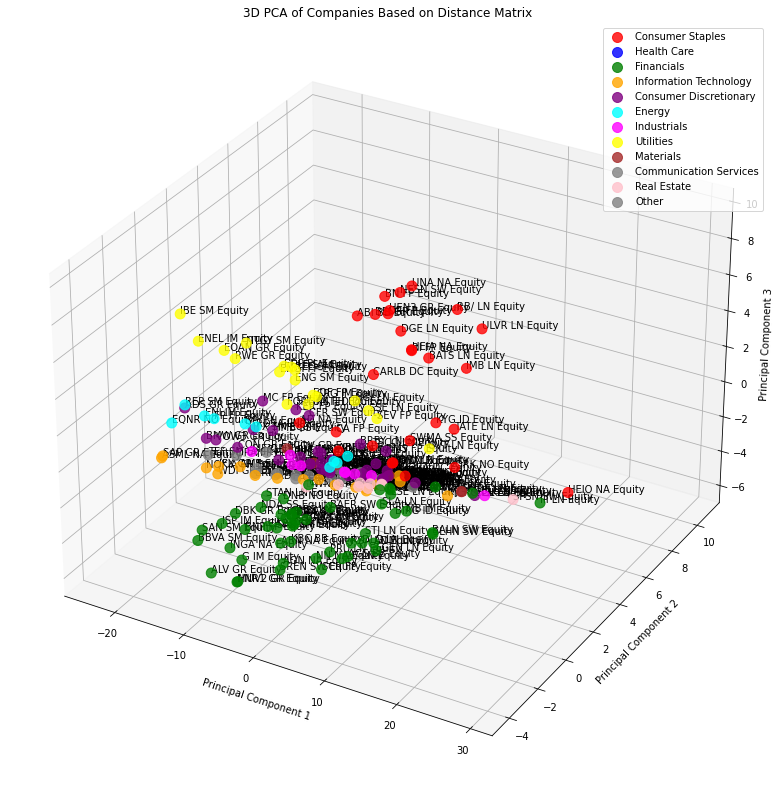

GIF saved as 'pca_rotation.gif'.


In [41]:
# original

# Filter the data for analyst 'Antpagna'
antpagna_data = df[df["ANALYST"] == "Antpagna"]

# Create a list of unique companies covered by 'Antpagna'
companies = antpagna_data["BBTICKER"].unique()

# Subset the distance matrix to include only these companies
distance_matrix = euclidean_distance_matrix.loc[companies, companies]

# Standardize the distance matrix
scaler = StandardScaler()
distance_matrix_std = scaler.fit_transform(distance_matrix)

# Apply PCA with 3 components
pca = PCA(n_components=3)
pca_components = pca.fit_transform(distance_matrix_std)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(pca_components, index=companies, columns=['PC1', 'PC2', 'PC3'])

# Mapping sector colors
sector_colors = {
    'Consumer Staples': 'red',
    'Health Care': 'blue',
    'Financials': 'green',
    'Information Technology': 'orange',
    'Consumer Discretionary': 'purple',
    'Energy': 'cyan',
    'Industrials': 'magenta',
    'Utilities': 'yellow',
    'Materials': 'brown',
    'Communication Services': 'gray',
    'Real Estate': 'pink',
    'Other': 'gray'  # additional catch-all for other sectors
}

# Assigning sector colors based on available data
pca_df['Sector'] = [df.loc[df['BBTICKER'] == company, 'GICS_SECTOR_NAME'].iloc[0] for company in companies]
pca_df['Color'] = [sector_colors.get(sector, 'gray') for sector in pca_df['Sector']]

# Create the 3D plot
fig = plt.figure(figsize=(20, 14))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colored sectors
scatters = {}
for sector, color in sector_colors.items():
    sector_df = pca_df[pca_df['Sector'] == sector]
    scatters[sector] = ax.scatter(sector_df['PC1'], sector_df['PC2'], sector_df['PC3'], color=color, label=sector, s=100, alpha=0.8)

# Annotate the points with company names
for i, company in enumerate(companies):
    ax.text(pca_df['PC1'][i], pca_df['PC2'][i], pca_df['PC3'][i], company, fontsize=10)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Companies Based on Distance Matrix')
ax.legend()
plt.show()

# Function to update the angle of the plot
def update(angle):
    ax.view_init(elev=30, azim=angle)

# Create animation
ani = FuncAnimation(fig, update, frames=range(0, 360, 5), interval=100)

# Save animation as a GIF
ani.save('pca_rotation.gif', writer='pillow', fps=10)

print("GIF saved as 'pca_rotation.gif'.")

In [42]:
# # Filter the data for analyst 'Antpagna'
# antpagna_data = df[df["ANALYST"] == "Antpagna"]

# # Create a list of unique companies covered by 'Antpagna'
# companies = antpagna_data["BBTICKER"].unique()

# # Subset the distance matrix to include only these companies
# distance_matrix = euclidean_distance_matrix.loc[companies, companies]

# # Standardize the distance matrix
# scaler = StandardScaler()
# distance_matrix_std = scaler.fit_transform(distance_matrix)

# # Apply PCA with 3 components
# pca = PCA(n_components=3)
# pca_components = pca.fit_transform(distance_matrix_std)

# # Create a DataFrame for the PCA results
# pca_df = pd.DataFrame(pca_components, index=companies, columns=['PC1', 'PC2', 'PC3'])

# # Mapping sector colors
# sector_colors = {
#     'Consumer Staples': 'red',
#     'Health Care': 'blue',
#     'Financials': 'green',
#     'Information Technology': 'orange',
#     'Consumer Discretionary': 'purple',
#     'Energy': 'cyan',
#     'Industrials': 'magenta',
#     'Utilities': 'yellow',
#     'Materials': 'brown',
#     'Communication Services': 'gray',
#     'Real Estate': 'pink',
#     'Other': 'gray'  # additional catch-all for other sectors
# }

# # Assigning sector colors based on available data
# pca_df['Sector'] = [df.loc[df['BBTICKER'] == company, 'GICS_SECTOR_NAME'].iloc[0] for company in companies]
# pca_df['Color'] = [sector_colors.get(sector, 'gray') for sector in pca_df['Sector']]

# # Create the 3D plot function
# def create_plot(ax):
#     # Scatter plot with colored sectors
#     for sector, color in sector_colors.items():
#         sector_df = pca_df[pca_df['Sector'] == sector]
#         ax.scatter(sector_df['PC1'], sector_df['PC2'], sector_df['PC3'], color=color, label=sector, s=100, alpha=0.8)

#     # Annotate the points with company names
#     for i, company in enumerate(companies):
#         ax.text(pca_df['PC1'][i], pca_df['PC2'][i], pca_df['PC3'][i], company, fontsize=10)

#     ax.set_xlabel('Principal Component 1')
#     ax.set_ylabel('Principal Component 2')
#     ax.set_zlabel('Principal Component 3')
#     ax.legend()

# # Animation for azimuthal rotation
# fig_azim = plt.figure(figsize=(20, 14))
# ax_azim = fig_azim.add_subplot(111, projection='3d')
# create_plot(ax_azim)

# def update_azim(angle):
#     ax_azim.view_init(elev=30, azim=angle)

# ani_azim = FuncAnimation(fig_azim, update_azim, frames=range(0, 360, 5), interval=100)
# ani_azim.save('pca_rotation_azim.mp4', writer='ffmpeg', fps=10)

# # Animation for elevational rotation
# fig_elev = plt.figure(figsize=(20, 14))
# ax_elev = fig_elev.add_subplot(111, projection='3d')
# create_plot(ax_elev)

# def update_elev(angle):
#     ax_elev.view_init(elev=angle, azim=45)

# ani_elev = FuncAnimation(fig_elev, update_elev, frames=range(0, 360, 5), interval=100)
# ani_elev.save('pca_rotation_elev.mp4', writer='ffmpeg', fps=10)

# # Animation for roll rotation (not directly supported by mpl_toolkits.mplot3d, workaround by adjusting azimuth)
# fig_roll = plt.figure(figsize=(20, 14))
# ax_roll = fig_roll.add_subplot(111, projection='3d')
# create_plot(ax_roll)

# def update_roll(angle):
#     ax_roll.view_init(elev=30, azim=45)
#     ax_roll.set_proj_type('ortho')
#     ax_roll.set_xlim3d([np.min(pca_df['PC1']), np.max(pca_df['PC1'])])
#     ax_roll.set_ylim3d([np.min(pca_df['PC2']), np.max(pca_df['PC2'])])
#     ax_roll.set_zlim3d([np.min(pca_df['PC3']), np.max(pca_df['PC3'])])
#     ax_roll.dist = 10  # Reset the distance to default to avoid zooming effect

# ani_roll = FuncAnimation(fig_roll, update_roll, frames=range(0, 360, 5), interval=100)
# ani_roll.save('pca_rotation_roll.mp4', writer='ffmpeg', fps=10)

# print("Videos saved as 'pca_rotation_azim.mp4', 'pca_rotation_elev.mp4', and 'pca_rotation_roll.mp4'.")

In [43]:
# # Filter the data for analyst 'Antpagna'
# antpagna_data = df[df["ANALYST"] == "Antpagna"]

# # Create a list of unique companies covered by 'Antpagna'
# companies = antpagna_data["BBTICKER"].unique()

# # Subset the distance matrix to include only these companies
# distance_matrix = euclidean_distance_matrix.loc[companies, companies]

# # Standardize the distance matrix
# scaler = StandardScaler()
# distance_matrix_std = scaler.fit_transform(distance_matrix)

# # Apply PCA with 3 components
# pca = PCA(n_components=3)
# pca_components = pca.fit_transform(distance_matrix_std)

# # Create a DataFrame for the PCA results
# pca_df = pd.DataFrame(pca_components, index=companies, columns=['PC1', 'PC2', 'PC3'])

# # Mapping sector colors
# sector_colors = {
#     'Consumer Staples': 'red',
#     'Health Care': 'blue',
#     'Financials': 'green',
#     'Information Technology': 'orange',
#     'Consumer Discretionary': 'purple',
#     'Energy': 'cyan',
#     'Industrials': 'magenta',
#     'Utilities': 'yellow',
#     'Materials': 'brown',
#     'Communication Services': 'gray',
#     'Real Estate': 'pink',
#     'Other': 'gray'  # additional catch-all for other sectors
# }

# # Assigning sector colors based on available data
# pca_df['Sector'] = [df.loc[df['BBTICKER'] == company, 'GICS_SECTOR_NAME'].iloc[0] for company in companies]
# pca_df['Color'] = [sector_colors.get(sector, 'gray') for sector in pca_df['Sector']]

# # Create the 3D plot function
# def create_plot(ax):
#     # Scatter plot with colored sectors
#     for sector, color in sector_colors.items():
#         sector_df = pca_df[pca_df['Sector'] == sector]
#         ax.scatter(sector_df['PC1'], sector_df['PC2'], sector_df['PC3'], color=color, label=sector, s=100, alpha=0.8)

#     # Annotate the points with company names
#     for i, company in enumerate(companies):
#         ax.text(pca_df['PC1'][i], pca_df['PC2'][i], pca_df['PC3'][i], company, fontsize=10)

#     ax.set_xlabel('Principal Component 1')
#     ax.set_ylabel('Principal Component 2')
#     ax.set_zlabel('Principal Component 3')
#     ax.legend()

# # Animation for rotation around x-axis (elevation)
# fig_elev = plt.figure(figsize=(20, 14))
# ax_elev = fig_elev.add_subplot(111, projection='3d')
# create_plot(ax_elev)

# def update_elev(angle):
#     ax_elev.view_init(elev=angle, azim=45)

# ani_elev = FuncAnimation(fig_elev, update_elev, frames=range(0, 90, 5), interval=100)
# ani_elev.save('pca_rotation_elev.gif', writer='pillow', fps=10)

# # Animation for rotation around y-axis (azimuthal)
# fig_azim = plt.figure(figsize=(20, 14))
# ax_azim = fig_azim.add_subplot(111, projection='3d')
# create_plot(ax_azim)

# def update_azim(angle):
#     ax_azim.view_init(elev=30, azim=angle)

# ani_azim = FuncAnimation(fig_azim, update_azim, frames=range(0, 360, 5), interval=100)
# ani_azim.save('pca_rotation_azim.gif', writer='pillow', fps=10)

# # Animation for rotation around z-axis (view changes)
# fig_zaxis = plt.figure(figsize=(20, 14))
# ax_zaxis = fig_zaxis.add_subplot(111, projection='3d')
# create_plot(ax_zaxis)

# def update_zaxis(angle):
#     ax_zaxis.view_init(elev=30, azim=45)
#     ax_zaxis.dist = 10  # Adjust distance to avoid zooming effect

# ani_zaxis = FuncAnimation(fig_zaxis, update_zaxis, frames=range(0, 360, 5), interval=100)
# ani_zaxis.save('pca_rotation_zaxis.gif', writer='pillow', fps=10)

# print("GIFs saved as 'pca_rotation_elev.gif', 'pca_rotation_azim.gif', and 'pca_rotation_zaxis.gif'.")

GIFs saved as 'pca_rotation_x.gif', 'pca_rotation_y.gif', and 'pca_rotation_z.gif'.


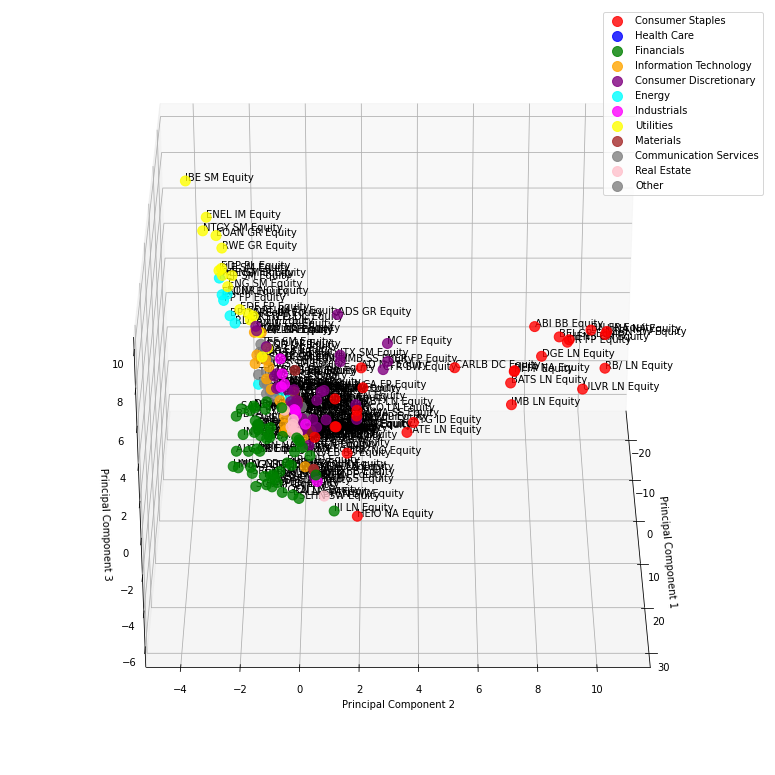

In [44]:
# Filter the data for analyst 'Antpagna'
antpagna_data = df[df["ANALYST"] == "Antpagna"]

# Create a list of unique companies covered by 'Antpagna'
companies = antpagna_data["BBTICKER"].unique()

# Subset the distance matrix to include only these companies
distance_matrix = euclidean_distance_matrix.loc[companies, companies]

# Standardize the distance matrix
scaler = StandardScaler()
distance_matrix_std = scaler.fit_transform(distance_matrix)

# Apply PCA with 3 components
pca = PCA(n_components=3)
pca_components = pca.fit_transform(distance_matrix_std)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(pca_components, index=companies, columns=['PC1', 'PC2', 'PC3'])

# Mapping sector colors
sector_colors = {
    'Consumer Staples': 'red',
    'Health Care': 'blue',
    'Financials': 'green',
    'Information Technology': 'orange',
    'Consumer Discretionary': 'purple',
    'Energy': 'cyan',
    'Industrials': 'magenta',
    'Utilities': 'yellow',
    'Materials': 'brown',
    'Communication Services': 'gray',
    'Real Estate': 'pink',
    'Other': 'gray'  # additional catch-all for other sectors
}

# Assigning sector colors based on available data
pca_df['Sector'] = [df.loc[df['BBTICKER'] == company, 'GICS_SECTOR_NAME'].iloc[0] for company in companies]
pca_df['Color'] = [sector_colors.get(sector, 'gray') for sector in pca_df['Sector']]

# Create the 3D plot function
def create_plot(ax):
    # Scatter plot with colored sectors
    for sector, color in sector_colors.items():
        sector_df = pca_df[pca_df['Sector'] == sector]
        ax.scatter(sector_df['PC1'], sector_df['PC2'], sector_df['PC3'], color=color, label=sector, s=100, alpha=0.8)

    # Annotate the points with company names
    for i, company in enumerate(companies):
        ax.text(pca_df['PC1'][i], pca_df['PC2'][i], pca_df['PC3'][i], company, fontsize=10)

    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.legend()

# Create the 3D plot
fig = plt.figure(figsize=(20, 14))
ax = fig.add_subplot(111, projection='3d')
create_plot(ax)

# Function to update the angle of the plot for x-axis rotation
def update_x(angle):
    ax.view_init(elev=0, azim=angle)

# Create animation for x-axis rotation
ani_x = FuncAnimation(fig, update_x, frames=range(0, 360, 5), interval=100)
ani_x.save('pca_rotation_x.gif', writer='pillow', fps=10)

# Function to update the angle of the plot for y-axis rotation
def update_y(angle):
    ax.view_init(elev=angle, azim=0)

# Create animation for y-axis rotation
ani_y = FuncAnimation(fig, update_y, frames=range(0, 90, 5), interval=100)
ani_y.save('pca_rotation_y.gif', writer='pillow', fps=10)

# Function to update the angle of the plot for z-axis rotation
def update_z(angle):
    ax.view_init(elev=30, azim=angle)

# Create animation for z-axis rotation
ani_z = FuncAnimation(fig, update_z, frames=range(0, 360, 5), interval=100)
ani_z.save('pca_rotation_z.gif', writer='pillow', fps=10)

print("GIFs saved as 'pca_rotation_x.gif', 'pca_rotation_y.gif', and 'pca_rotation_z.gif'.")

# 4 dimensions

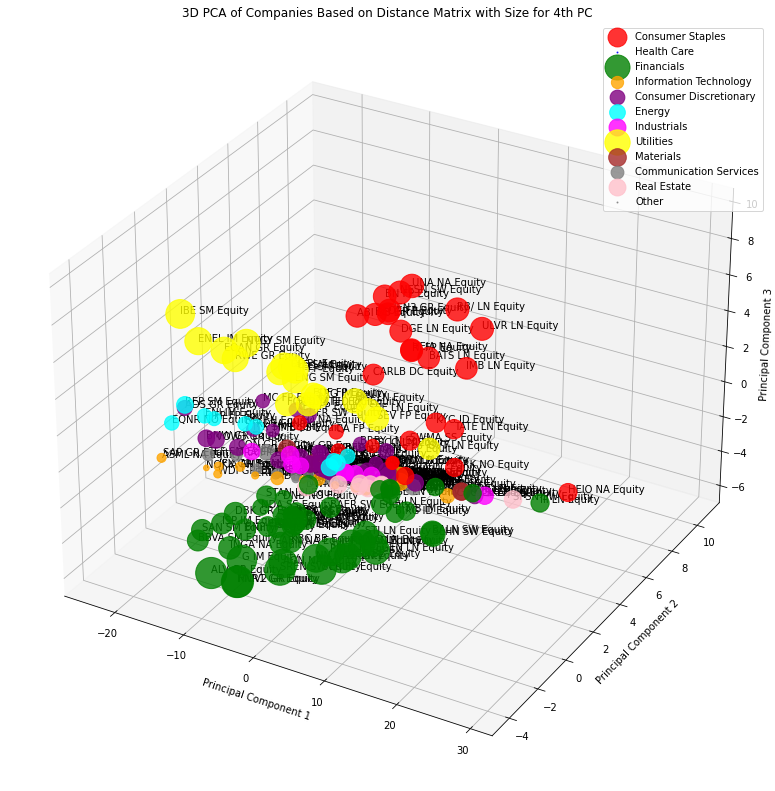

In [45]:
# not so useful anymore..

# Filter the data for analyst 'Antpagna'
antpagna_data = df[df["ANALYST"] == "Antpagna"]

# Create a list of unique companies covered by 'Antpagna'
companies = antpagna_data["BBTICKER"].unique()

# Subset the distance matrix to include only these companies
distance_matrix = euclidean_distance_matrix.loc[companies, companies]

# Standardize the distance matrix
scaler = StandardScaler()
distance_matrix_std = scaler.fit_transform(distance_matrix)

# Apply PCA with 4 components
pca = PCA(n_components=4)
pca_components = pca.fit_transform(distance_matrix_std)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(pca_components, index=companies, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Mapping sector colors
sector_colors = {
    'Consumer Staples': 'red',
    'Health Care': 'blue',
    'Financials': 'green',
    'Information Technology': 'orange',
    'Consumer Discretionary': 'purple',
    'Energy': 'cyan',
    'Industrials': 'magenta',
    'Utilities': 'yellow',
    'Materials': 'brown',
    'Communication Services': 'gray',
    'Real Estate': 'pink',
    'Other': 'gray'  # additional catch-all for other sectors
}

# Assigning sector colors based on available data
pca_df['Sector'] = [df.loc[df['BBTICKER'] == company, 'GICS_SECTOR_NAME'].iloc[0] for company in companies]
pca_df['Color'] = [sector_colors.get(sector, 'gray') for sector in pca_df['Sector']]

# Normalize the fourth principal component for better visualization
pca_df['PC4_normalized'] = (pca_df['PC4'] - pca_df['PC4'].min()) / (pca_df['PC4'].max() - pca_df['PC4'].min())

# Plot the PCA results with colored sectors in 3D and size representing the fourth component
fig = plt.figure(figsize=(20, 14))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colored sectors and size for the fourth component
for sector, color in sector_colors.items():
    sector_df = pca_df[pca_df['Sector'] == sector]
    ax.scatter(sector_df['PC1'], sector_df['PC2'], sector_df['PC3'],
               color=color, label=sector, s=sector_df['PC4_normalized']*1000, alpha=0.8)

# Annotate the points with company names
for i, company in enumerate(companies):
    ax.text(pca_df['PC1'][i], pca_df['PC2'][i], pca_df['PC3'][i], company, fontsize=10)

# Set axis labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Companies Based on Distance Matrix with Size for 4th PC')

# Tilt the view
# ax.view_init(elev=30, azim=45)  # You can adjust these values as needed

ax.legend()
plt.show()

# b. How would the results change if you were to restrict the dataset to only analysts having companies covered within 1s.d. of the distribution found in Qn. 2? 

In [46]:
# Calculate the number of unique companies covered by each analyst
analyst_companies_count = df.groupby('ANALYST')['BBTICKER'].nunique()

# Calculate mean and standard deviation
mean_companies = analyst_companies_count.mean()
std_companies = analyst_companies_count.std()

# Define the range for inclusion (within 1 standard deviation)
lower_bound = mean_companies - std_companies
upper_bound = mean_companies + std_companies

# Identify analysts within the specified range
selected_analysts = analyst_companies_count[
    (analyst_companies_count >= lower_bound) & (analyst_companies_count <= upper_bound)
].index.tolist()

# Filter the original dataframe to include data only for selected analysts
df_filtered = df[df['ANALYST'].isin(selected_analysts)]

In [47]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# Grouping by ANALYST and creating a binary matrix of analyst co-coverage
analyst_coverage_matrix = df_filtered.groupby(['ANALYST', 'BBTICKER']).size().unstack().notnull().astype(int)

# Calculating cosine similarity between each pair of companies
cosine_similarities = cosine_similarity(analyst_coverage_matrix.T)

# Calculating Euclidean distance between each pair of companies
euclidean_distances = euclidean_distances(analyst_coverage_matrix.T)

# Creating similarity and distance matrices
companies = analyst_coverage_matrix.columns
cosine_similarity_matrix = pd.DataFrame(cosine_similarities, index=companies, columns=companies)
euclidean_distance_matrix = pd.DataFrame(euclidean_distances, index=companies, columns=companies)

In [48]:
# # Filter the data for analyst 'Antpagna'
# antpagna_data = df[df["ANALYST"] == "Antpagna"]

# # Create a list of unique companies covered by 'Antpagna'
# companies = antpagna_data["BBTICKER"].unique()

# # Subset the distance matrix to include only these companies
# distance_matrix = euclidean_distance_matrix.loc[companies, companies]

# # Standardize the distance matrix
# scaler = StandardScaler()
# distance_matrix_std = scaler.fit_transform(distance_matrix)

# # Apply PCA
# pca = PCA(n_components=2)
# pca_components = pca.fit_transform(distance_matrix_std)

# # Create a DataFrame for the PCA results
# pca_df = pd.DataFrame(pca_components, index=companies, columns=['PC1', 'PC2'])

# # Mapping sector colors
# sector_colors = {
#     'Consumer Staples': 'red',
#     'Health Care': 'blue',
#     'Financials': 'green',
#     'Information Technology': 'orange',
#     'Consumer Discretionary': 'purple',
#     'Energy': 'cyan',
#     'Industrials': 'magenta',
#     'Utilities': 'yellow',
#     'Materials': 'brown',
#     'Communication Services': 'gray',
#     'Real Estate': 'pink',
#     'Other': 'gray'  # additional catch-all for other sectors
# }

# # Assigning sector colors based on available data
# pca_df['Sector'] = [antpagna_data.loc[antpagna_data['BBTICKER'] == company, 'GICS_SECTOR_NAME'].iloc[0] for company in companies]
# pca_df['Color'] = [sector_colors.get(sector, 'gray') for sector in pca_df['Sector']]

# # Plot the PCA results with colored sectors
# plt.figure(figsize=(20, 14))

# # Scatter plot with colored sectors
# for sector, color in sector_colors.items():
#     plt.scatter(pca_df.loc[pca_df['Sector'] == sector, 'PC1'],
#                 pca_df.loc[pca_df['Sector'] == sector, 'PC2'],
#                 color=color, label=sector, s=100, alpha=0.8)

# # Annotate the points with company names
# for i, txt in enumerate(companies):
#     plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), fontsize=10)

# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA of Companies Based on Distance Matrix')
# plt.legend()
# plt.show()

In [49]:
# a = [df.loc[df['BBTICKER'] == company, 'GICS_SECTOR_NAME'].iloc[0] for company in companies]
# b = [antpagna_data.loc[antpagna_data['BBTICKER'] == company, 'GICS_SECTOR_NAME'].iloc[0] for company in companies]
# a == b

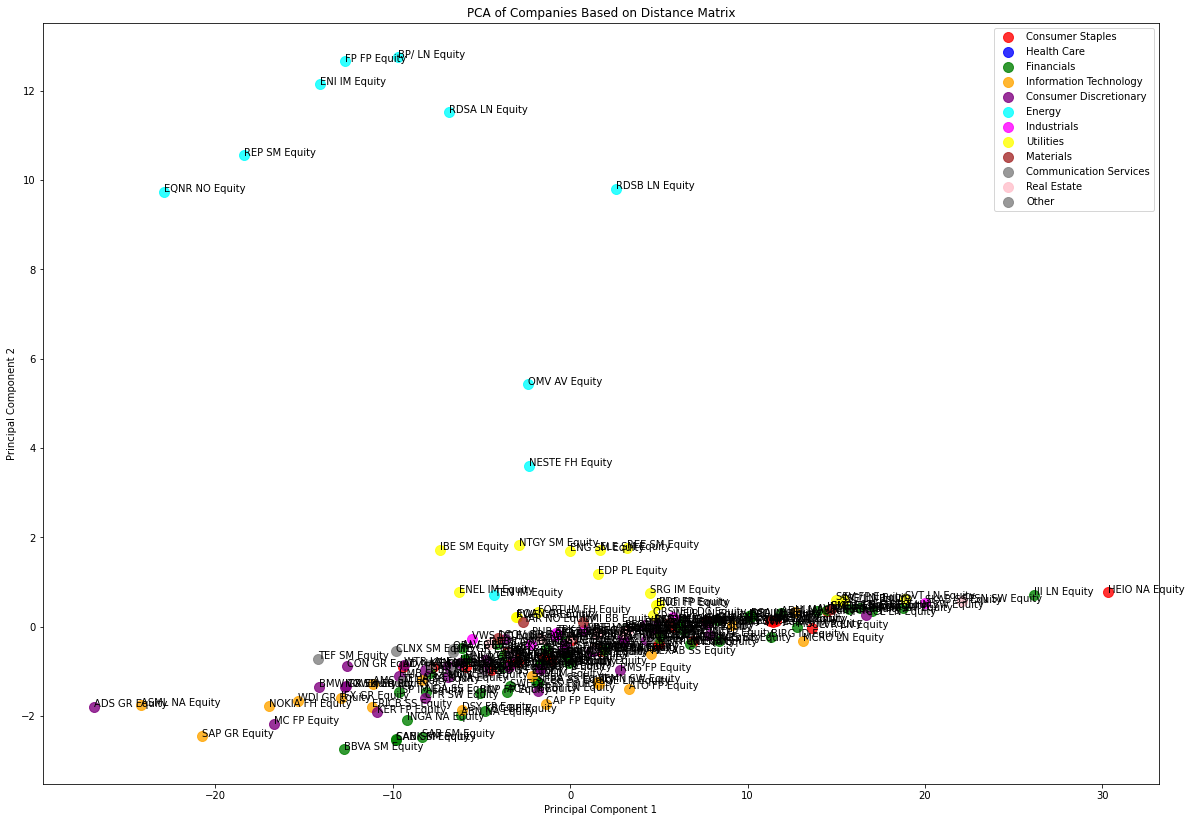

In [50]:
# Filter the data for analyst 'Antpagna'
antpagna_data = df[df["ANALYST"] == "Antpagna"]

# Create a list of unique companies covered by 'Antpagna'
companies = antpagna_data["BBTICKER"].unique()

# Subset the distance matrix to include only these companies
distance_matrix = euclidean_distance_matrix.loc[companies, companies]

# Standardize the distance matrix
scaler = StandardScaler()
distance_matrix_std = scaler.fit_transform(distance_matrix)

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(distance_matrix_std)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(pca_components, index=companies, columns=['PC1', 'PC2'])

# Mapping sector colors
sector_colors = {
    'Consumer Staples': 'red',
    'Health Care': 'blue',
    'Financials': 'green',
    'Information Technology': 'orange',
    'Consumer Discretionary': 'purple',
    'Energy': 'cyan',
    'Industrials': 'magenta',
    'Utilities': 'yellow',
    'Materials': 'brown',
    'Communication Services': 'gray',
    'Real Estate': 'pink',
    'Other': 'gray'  # additional catch-all for other sectors
}

# Assigning sector colors based on available data
pca_df['Sector'] = [df.loc[df['BBTICKER'] == company, 'GICS_SECTOR_NAME'].iloc[0] for company in companies]
pca_df['Color'] = [sector_colors.get(sector, 'gray') for sector in pca_df['Sector']]

# Plot the PCA results with colored sectors
plt.figure(figsize=(20, 14))

# Scatter plot with colored sectors
for sector, color in sector_colors.items():
    plt.scatter(pca_df.loc[pca_df['Sector'] == sector, 'PC1'],
                pca_df.loc[pca_df['Sector'] == sector, 'PC2'],
                color=color, label=sector, s=100, alpha=0.8)

# Annotate the points with company names
for i, txt in enumerate(companies):
    plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), fontsize=10)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Companies Based on Distance Matrix')
plt.legend()
plt.show()

In [51]:
# # Wayne's part
# analyst_coverage_df = df.copy()
# analyst_coverage_df

In [52]:
# # Calculate the mean and standard deviation of companies covered by analysts
# coverage_stats = analyst_coverage_df.groupby('ANALYST')['BBTICKER'].nunique()
# mean_coverage = coverage_stats.mean()
# std_coverage = coverage_stats.std()

# # Filter analysts within 1 standard deviation of the mean
# filtered_analysts = coverage_stats[(coverage_stats >= (mean_coverage - std_coverage)) & 
#                                    (coverage_stats <= (mean_coverage + std_coverage))].index

# # Create the binary matrix for the filtered dataset
# filtered_coverage_df = analyst_coverage_df[analyst_coverage_df['ANALYST'].isin(filtered_analysts)]
# filtered_company_analyst_matrix = pd.crosstab(filtered_coverage_df['BBTICKER'], filtered_coverage_df['ANALYST'])

# # Calculate the similarity matrix for the filtered dataset
# filtered_similarity_matrix = cosine_similarity(filtered_company_analyst_matrix)
# filtered_similarity_df = pd.DataFrame(filtered_similarity_matrix, index=filtered_company_analyst_matrix.index, columns=filtered_company_analyst_matrix.index)

# # Display the filtered similarity matrix
# filtered_similarity_df.head()

In [53]:
# # Group by ANALYST and BBTICKER to create analyst coverage matrix
# analyst_coverage_matrix = df.groupby(['ANALYST', 'BBTICKER']).size().unstack().notnull().astype(int)

# # Calculate analyst coverage
# analyst_coverage = df.groupby('ANALYST')['BBTICKER'].nunique()

# # Calculate mean and standard deviation of the coverage
# mean_coverage = analyst_coverage.mean()
# std_coverage = analyst_coverage.std()

# # Filter analysts within one standard deviation
# filtered_analysts = analyst_coverage[(analyst_coverage >= (mean_coverage - std_coverage)) & 
#                                      (analyst_coverage <= (mean_coverage + std_coverage))].index
# filtered_df = df[df['ANALYST'].isin(filtered_analysts)]

# # Recompute the analyst coverage matrix for the filtered dataset
# filtered_analyst_coverage_matrix = filtered_df.groupby(['ANALYST', 'BBTICKER']).size().unstack().notnull().astype(int)

# # Calculate cosine similarity
# cosine_similarities = cosine_similarity(filtered_analyst_coverage_matrix.T)

# # Create similarity matrix
# companies = filtered_analyst_coverage_matrix.columns
# cosine_similarity_matrix = pd.DataFrame(cosine_similarities, index=companies, columns=companies)

# # Plotting the heatmap
# plt.figure(figsize=(12, 10))
# sns.heatmap(cosine_similarity_matrix, cmap="coolwarm", annot=True, fmt=".2f")
# plt.title('Cosine Similarity between Companies')
# plt.xlabel('Company')
# plt.ylabel('Company')
# plt.xticks(rotation=45)
# plt.yticks(rotation=0)
# plt.tight_layout()
# plt.show()

# c. If further restricted to a smaller subset?

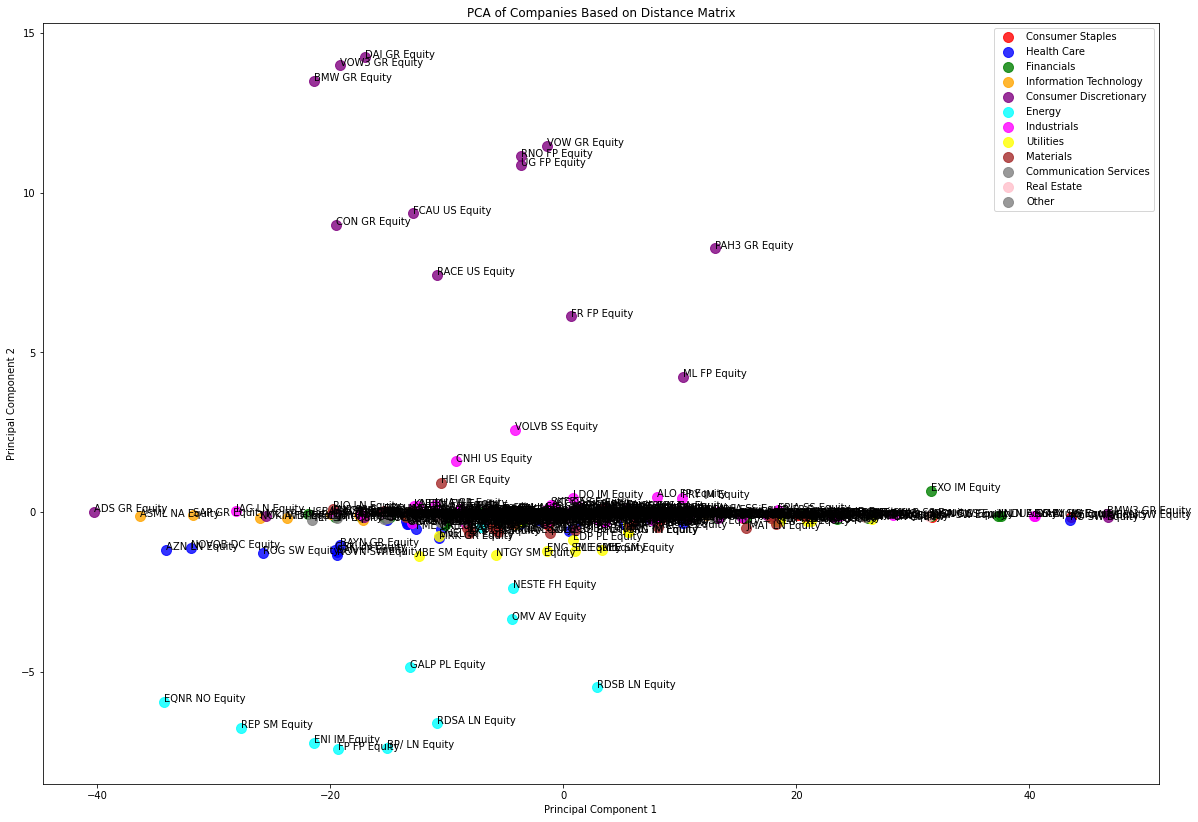

In [54]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# Filter analysts based on companies covered within 1 standard deviation of the distribution
analyst_coverage = df.groupby('ANALYST')['BBTICKER'].nunique()
mean_coverage = analyst_coverage.mean()
std_coverage = analyst_coverage.std()
# (analyst_companies_count >= lower_bound) & (analyst_companies_count <= upper_bound)
selected_analysts = analyst_coverage[(analyst_coverage <= mean_coverage + std_coverage)].index

# Filter the data for selected analysts
selected_data = df[df['ANALYST'].isin(selected_analysts)]

# Grouping by ANALYST and creating a binary matrix of analyst co-coverage
analyst_coverage_matrix = selected_data.groupby(['ANALYST', 'BBTICKER']).size().unstack().notnull().astype(int)

# Calculating cosine similarity between each pair of companies
cosine_similarities = cosine_similarity(analyst_coverage_matrix.T)

# Calculating Euclidean distance between each pair of companies
euclidean_distances = euclidean_distances(analyst_coverage_matrix.T)

# Creating similarity and distance matrices
companies = analyst_coverage_matrix.columns
cosine_similarity_matrix = pd.DataFrame(cosine_similarities, index=companies, columns=companies)
euclidean_distance_matrix = pd.DataFrame(euclidean_distances, index=companies, columns=companies)

# Create a list of unique companies covered by selected analysts
companies = selected_data["BBTICKER"].unique()

# Subset the distance matrix to include only these companies
distance_matrix = euclidean_distance_matrix.loc[companies, companies]

# Standardize the distance matrix
scaler = StandardScaler()
distance_matrix_std = scaler.fit_transform(distance_matrix)

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(distance_matrix_std)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(pca_components, index=companies, columns=['PC1', 'PC2'])

# Mapping sector colors
sector_colors = {
    'Consumer Staples': 'red',
    'Health Care': 'blue',
    'Financials': 'green',
    'Information Technology': 'orange',
    'Consumer Discretionary': 'purple',
    'Energy': 'cyan',
    'Industrials': 'magenta',
    'Utilities': 'yellow',
    'Materials': 'brown',
    'Communication Services': 'gray',
    'Real Estate': 'pink',
    'Other': 'gray'  # additional catch-all for other sectors
}

# Assigning sector colors based on available data
pca_df['Sector'] = [selected_data.loc[selected_data['BBTICKER'] == company, 'GICS_SECTOR_NAME'].iloc[0] for company in companies]
pca_df['Color'] = [sector_colors.get(sector, 'gray') for sector in pca_df['Sector']]

# Plot the PCA results with colored sectors
plt.figure(figsize=(20, 14))

# Scatter plot with colored sectors
for sector, color in sector_colors.items():
    plt.scatter(pca_df.loc[pca_df['Sector'] == sector, 'PC1'],
                pca_df.loc[pca_df['Sector'] == sector, 'PC2'],
                color=color, label=sector, s=100, alpha=0.8)

# Annotate the points with company names
for i, txt in enumerate(companies):
    plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), fontsize=10)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Companies Based on Distance Matrix')
plt.legend()
plt.show()

In [55]:
# top_analysts = coverage_stats.nlargest(10).index

# # Create the binary matrix for the top analysts
# top_coverage_df = analyst_coverage_df[analyst_coverage_df['ANALYST'].isin(top_analysts)]
# top_company_analyst_matrix = pd.crosstab(top_coverage_df['BBTICKER'], top_coverage_df['ANALYST'])

# # Calculate the similarity matrix for the top analysts dataset
# top_similarity_matrix = cosine_similarity(top_company_analyst_matrix)
# top_similarity_df = pd.DataFrame(top_similarity_matrix, index=top_company_analyst_matrix.index, columns=top_company_analyst_matrix.index)

# # Display the top similarity matrix
# top_similarity_df.head()

In [56]:
# # Group by ANALYST and BBTICKER to create analyst coverage matrix
# analyst_coverage_matrix = df.groupby(['ANALYST', 'BBTICKER']).size().unstack().notnull().astype(int)

# # Calculate analyst coverage
# analyst_coverage = df.groupby('ANALYST')['BBTICKER'].nunique()

# # Calculate mean and standard deviation of the coverage
# mean_coverage = analyst_coverage.mean()
# std_coverage = analyst_coverage.std()

# # Filter analysts within one standard deviation
# filtered_analysts = analyst_coverage[(analyst_coverage >= (mean_coverage - std_coverage)) & 
#                                      (analyst_coverage <= (mean_coverage + std_coverage))].index
# filtered_df = df[df['ANALYST'].isin(filtered_analysts)]

# # Further restrict to a smaller subset of companies for demonstration purposes
# small_subset_companies = ['CLNX SM Equity', 'KNEBV FH Equity', 'ENG SM Equity', 'OCDO LN Equity']
# filtered_df_small = filtered_df[filtered_df['BBTICKER'].isin(small_subset_companies)]

# # Recompute the analyst coverage matrix for the filtered dataset
# filtered_analyst_coverage_matrix_small = filtered_df_small.groupby(['ANALYST', 'BBTICKER']).size().unstack().notnull().astype(int)

# # Calculate cosine similarity
# cosine_similarities_small = cosine_similarity(filtered_analyst_coverage_matrix_small.T)

# # Create similarity matrix
# companies_small = filtered_analyst_coverage_matrix_small.columns
# cosine_similarity_matrix_small = pd.DataFrame(cosine_similarities_small, index=companies_small, columns=companies_small)

# # Plotting the heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(cosine_similarity_matrix_small, cmap="coolwarm", annot=True, fmt=".2f")
# plt.title('Cosine Similarity between Companies')
# plt.xlabel('Company')
# plt.ylabel('Company')
# plt.xticks(rotation=45)
# plt.yticks(rotation=0)
# plt.tight_layout()
# plt.show()

# 4. Which sectors are the most heterogenous? (Look at the clusters formed by industry groups per sector – use t-SNE to visualize)

In [57]:
# Wayne's part
analyst_coverage_df = df.copy()
analyst_coverage_df

ANALYST       DATE BROKER  RATING RECOMMENDATION  TARGET_PRICE  \
0     Jamrgett   3/5/2020  Beerg     5.0            buy  1.220000e+02   
1     Joneeney   3/3/2020  Corch     3.0    equalweight  1.050000e+02   
2     MarDeboo   3/2/2020  Jeies     3.0           hold  1.050000e+02   
3     Niclberg   3/1/2020  Lirum     3.0           hold  1.070000e+02   
4     Antpagna  2/27/2020  ISEVA     5.0     overweight -2.420000e-14   
...        ...        ...    ...     ...            ...           ...   
8671  Inghmidt   4/7/2016  Hasse     1.0           sell -2.420000e-14   
8672  Xavaroen   3/9/2018  Br Co     3.0        neutral  8.800000e+01   
8673  FraMaury   4/4/2016  OdBHF     2.0         reduce  8.900000e+01   
8674  RenWeber   2/4/2020  Ba AG     3.0           hold  5.000000e+01   
8675  Loiorvan  3/20/2017  Br Co     3.0        neutral  3.050000e+02   

            BBTICKER        GICS_SECTOR_NAME     GICS_INDUSTRY_GROUP_NAME  
0     NESN SW Equity        Consumer Staples     Food, Beverage & Tobacco  
1     NESN SW Equity        Consumer Staples     Food, Beverage & Tobacco  
2     NESN SW Equity        Consumer Staples     Food, Beverage & Tobacco  
3     NESN SW Equity        Consumer Staples     Food, Beverage & Tobacco  
4     NESN SW Equity        Consumer Staples     Food, Beverage & Tobacco  
...              ...                     ...                          ...  
8671   LHA GR Equity             Industrials               Transportation  
8672  BMW3 GR Equity  Consumer Discretionary     Automobiles & Components  
8673  BMW3 GR Equity  Consumer Discretionary     Automobiles & Components  
8674  UHRN SW Equity  Consumer Discretionary  Consumer Durables & Apparel  
8675  UHRN SW Equity  Consumer Discretionary  Consumer Durables & Apparel  

[8676 rows x 9 columns]

In [58]:
# # Calculate the mean and standard deviation of companies covered by analysts
# coverage_stats = analyst_coverage_df.groupby('ANALYST')['BBTICKER'].nunique()
# mean_coverage = coverage_stats.mean()
# std_coverage = coverage_stats.std()

# # Filter analysts within 1 standard deviation of the mean
# filtered_analysts = coverage_stats[(coverage_stats >= (mean_coverage - std_coverage)) & 
#                                    (coverage_stats <= (mean_coverage + std_coverage))].index

# # Create the binary matrix for the filtered dataset
# filtered_coverage_df = analyst_coverage_df[analyst_coverage_df['ANALYST'].isin(filtered_analysts)]
# filtered_company_analyst_matrix = pd.crosstab(filtered_coverage_df['BBTICKER'], filtered_coverage_df['ANALYST'])

# # Calculate the similarity matrix for the filtered dataset
# filtered_similarity_matrix = cosine_similarity(filtered_company_analyst_matrix)
# filtered_similarity_df = pd.DataFrame(filtered_similarity_matrix, index=filtered_company_analyst_matrix.index, columns=filtered_company_analyst_matrix.index)

# # Display the filtered similarity matrix
# filtered_similarity_df.head()

In [59]:
# # Group by ANALYST and BBTICKER to create analyst coverage matrix
# analyst_coverage_matrix = df.groupby(['ANALYST', 'BBTICKER']).size().unstack().notnull().astype(int)

# # Calculate analyst coverage
# analyst_coverage = df.groupby('ANALYST')['BBTICKER'].nunique()

# # Calculate mean and standard deviation of the coverage
# mean_coverage = analyst_coverage.mean()
# std_coverage = analyst_coverage.std()

# # Filter analysts within one standard deviation
# filtered_analysts = analyst_coverage[(analyst_coverage >= (mean_coverage - std_coverage)) & 
#                                      (analyst_coverage <= (mean_coverage + std_coverage))].index
# filtered_df = df[df['ANALYST'].isin(filtered_analysts)]

# # Recompute the analyst coverage matrix for the filtered dataset
# filtered_analyst_coverage_matrix = filtered_df.groupby(['ANALYST', 'BBTICKER']).size().unstack().notnull().astype(int)

# # Calculate cosine similarity
# cosine_similarities = cosine_similarity(filtered_analyst_coverage_matrix.T)

# # Create similarity matrix
# companies = filtered_analyst_coverage_matrix.columns
# cosine_similarity_matrix = pd.DataFrame(cosine_similarities, index=companies, columns=companies)

# # Plotting the heatmap
# plt.figure(figsize=(12, 10))
# sns.heatmap(cosine_similarity_matrix, cmap="coolwarm", annot=True, fmt=".2f")
# plt.title('Cosine Similarity between Companies')
# plt.xlabel('Company')
# plt.ylabel('Company')
# plt.xticks(rotation=45)
# plt.yticks(rotation=0)
# plt.tight_layout()
# plt.show()

/Users/mintonyap/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/mintonyap/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


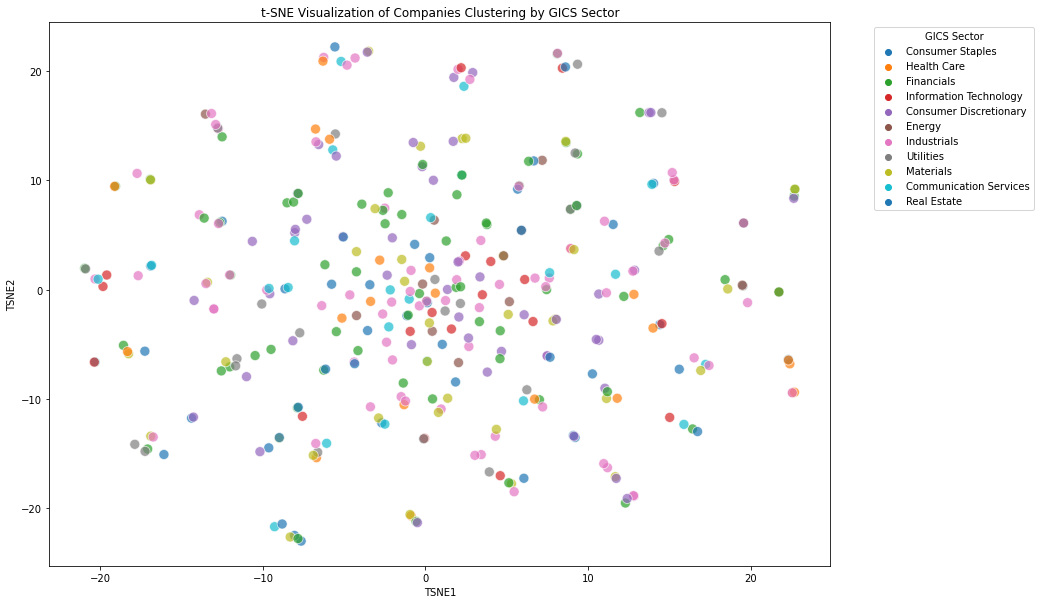

[('Health Care', 19.831884657218737),
 ('Utilities', 19.623962566870862),
 ('Real Estate', 18.638165483758794),
 ('Materials', 18.40109622384733),
 ('Industrials', 18.000716231012426),
 ('Communication Services', 17.931701415458715),
 ('Consumer Staples', 17.605534204600207),
 ('Financials', 17.596287383713992),
 ('Information Technology', 17.439837488075955),
 ('Consumer Discretionary', 17.114075161751046),
 ('Energy', 11.827970124408855)]

In [60]:
# Create the binary matrix for companies and analysts
company_analyst_matrix = pd.crosstab(analyst_coverage_df['BBTICKER'], analyst_coverage_df['ANALYST'])

# Apply t-SNE to the binary matrix
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(company_analyst_matrix)

# Add t-SNE results to the original dataframe
company_info = analyst_coverage_df[['BBTICKER', 'GICS_SECTOR_NAME', 'GICS_INDUSTRY_GROUP_NAME']].drop_duplicates()
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df = pd.concat([tsne_df, company_info.reset_index(drop=True)], axis=1)

# Plot t-SNE results with companies color-coded by their GICS sector
plt.figure(figsize=(14, 10))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='GICS_SECTOR_NAME', data=tsne_df, palette='tab10', s=100, alpha=0.7)

plt.title('t-SNE Visualization of Companies Clustering by GICS Sector')
plt.legend(title='GICS Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Calculate pairwise distances for t-SNE results
distances = pdist(tsne_results)
distance_matrix = squareform(distances)

# Calculate average distance within each sector's cluster
heterogeneity_scores = {}
for sector in tsne_df['GICS_SECTOR_NAME'].unique():
    sector_indices = tsne_df[tsne_df['GICS_SECTOR_NAME'] == sector].index
    sector_distances = distance_matrix[np.ix_(sector_indices, sector_indices)]
    # Compute the average distance for this sector
    avg_distance = np.mean(sector_distances)
    heterogeneity_scores[sector] = avg_distance

# Sort sectors by heterogeneity
sorted_heterogeneity_scores = sorted(heterogeneity_scores.items(), key=lambda x: x[1], reverse=True)

# Display sorted heterogeneity scores
sorted_heterogeneity_scores

# 5. Similarly, which sectors are the most homogenous?

/Users/mintonyap/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/mintonyap/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


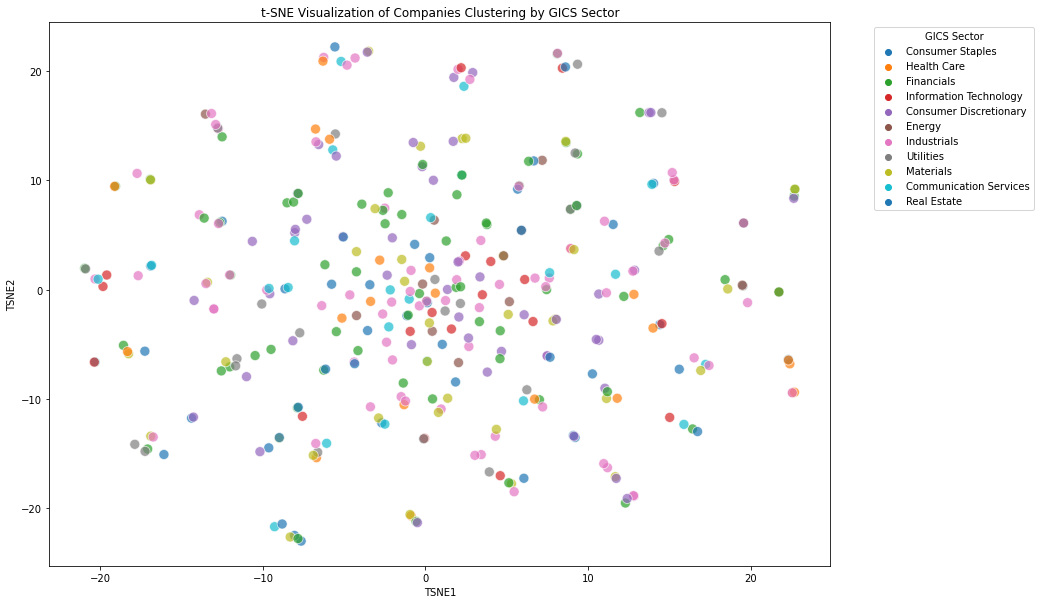


Most Homogeneous Sectors:
Energy: 11.827970124408855
Consumer Discretionary: 17.114075161751046
Information Technology: 17.439837488075955
Financials: 17.596287383713992
Consumer Staples: 17.605534204600207
Communication Services: 17.931701415458715
Industrials: 18.000716231012426
Materials: 18.40109622384733
Real Estate: 18.638165483758794
Utilities: 19.623962566870862
Health Care: 19.831884657218737


In [61]:
# Create the binary matrix for companies and analysts
company_analyst_matrix = pd.crosstab(analyst_coverage_df['BBTICKER'], analyst_coverage_df['ANALYST'])

# Apply t-SNE to the binary matrix
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(company_analyst_matrix)

# Add t-SNE results to the original dataframe
company_info = analyst_coverage_df[['BBTICKER', 'GICS_SECTOR_NAME', 'GICS_INDUSTRY_GROUP_NAME']].drop_duplicates()
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df = pd.concat([tsne_df, company_info.reset_index(drop=True)], axis=1)

# Plot t-SNE results with companies color-coded by their GICS sector
plt.figure(figsize=(14, 10))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='GICS_SECTOR_NAME', data=tsne_df, palette='tab10', s=100, alpha=0.7)

plt.title('t-SNE Visualization of Companies Clustering by GICS Sector')
plt.legend(title='GICS Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Calculate pairwise distances for t-SNE results
distances = pdist(tsne_results)
distance_matrix = squareform(distances)

# Calculate average distance within each sector's cluster
heterogeneity_scores = {}
for sector in tsne_df['GICS_SECTOR_NAME'].unique():
    sector_indices = tsne_df[tsne_df['GICS_SECTOR_NAME'] == sector].index
    sector_distances = distance_matrix[np.ix_(sector_indices, sector_indices)]
    # Compute the average distance for this sector
    avg_distance = np.mean(sector_distances)
    heterogeneity_scores[sector] = avg_distance

# Sort sectors by heterogeneity
sorted_heterogeneity_scores = sorted(heterogeneity_scores.items(), key=lambda x: x[1], reverse=True)
sorted_homogeneity_scores = sorted(heterogeneity_scores.items(), key=lambda x: x[1])

# Display sorted heterogeneity scores (most heterogeneous sectors)
# print("Most Heterogeneous Sectors:")
# for sector, score in sorted_heterogeneity_scores:
#     print(f"{sector}: {score}")

# Display sorted homogeneity scores (most homogeneous sectors)
print("\nMost Homogeneous Sectors:")
for sector, score in sorted_homogeneity_scores:
    print(f"{sector}: {score}")


# 6. What type of companies tend to be outliers in terms of the clusters?

In [62]:
# Create the binary matrix for companies and analysts
company_analyst_matrix = pd.crosstab(analyst_coverage_df['BBTICKER'], analyst_coverage_df['ANALYST'])

# Apply t-SNE to the binary matrix
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(company_analyst_matrix)

# Add t-SNE results to the original dataframe
company_info = analyst_coverage_df[['BBTICKER', 'GICS_SECTOR_NAME', 'GICS_INDUSTRY_GROUP_NAME']].drop_duplicates()
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df = pd.concat([tsne_df, company_info.reset_index(drop=True)], axis=1)

# Compute the centroid of each cluster
centroids = tsne_df.groupby('GICS_SECTOR_NAME')[['TSNE1', 'TSNE2']].mean()

# Calculate the distance of each company from the centroid of its cluster
tsne_df['distance_from_centroid'] = tsne_df.apply(
    lambda row: np.linalg.norm(row[['TSNE1', 'TSNE2']] - centroids.loc[row['GICS_SECTOR_NAME']]), axis=1
)

# Identify outliers in each sector
outliers = []

for sector in tsne_df['GICS_SECTOR_NAME'].unique():
    sector_data = tsne_df[tsne_df['GICS_SECTOR_NAME'] == sector]
    q1 = sector_data['distance_from_centroid'].quantile(0.25)
    q3 = sector_data['distance_from_centroid'].quantile(0.75)
    iqr = q3 - q1
    threshold = q3 + 1.5 * iqr
    sector_outliers = sector_data[sector_data['distance_from_centroid'] > threshold]
    outliers.append(sector_outliers)

outliers_df = pd.concat(outliers)

# Display the outliers
print(outliers_df[['BBTICKER', 'GICS_SECTOR_NAME', 'distance_from_centroid']])

/Users/mintonyap/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/mintonyap/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


       BBTICKER GICS_SECTOR_NAME  distance_from_centroid
9  FP FP Equity           Energy               20.873282


# 7. Feel free to explore and provide deeper insights in the structure of the clusters/network as part of the outputs.

/Users/mintonyap/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/mintonyap/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Index(['ANALYST', 'DATE', 'BROKER', 'RATING', 'RECOMMENDATION', 'TARGET_PRICE',
       'BBTICKER', 'GICS_SECTOR_NAME', 'GICS_INDUSTRY_GROUP_NAME', 'TSNE1',
       'TSNE2'],
      dtype='object')


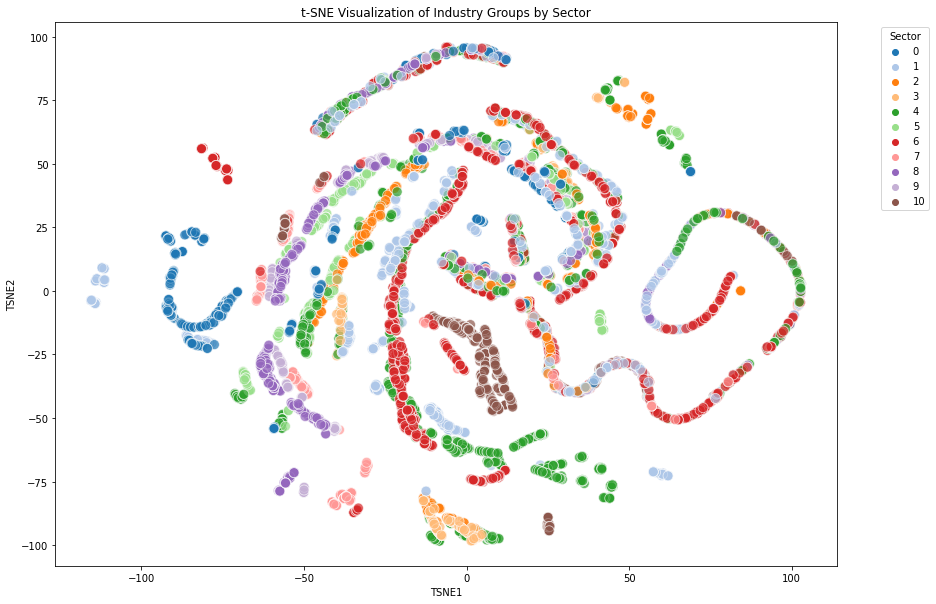

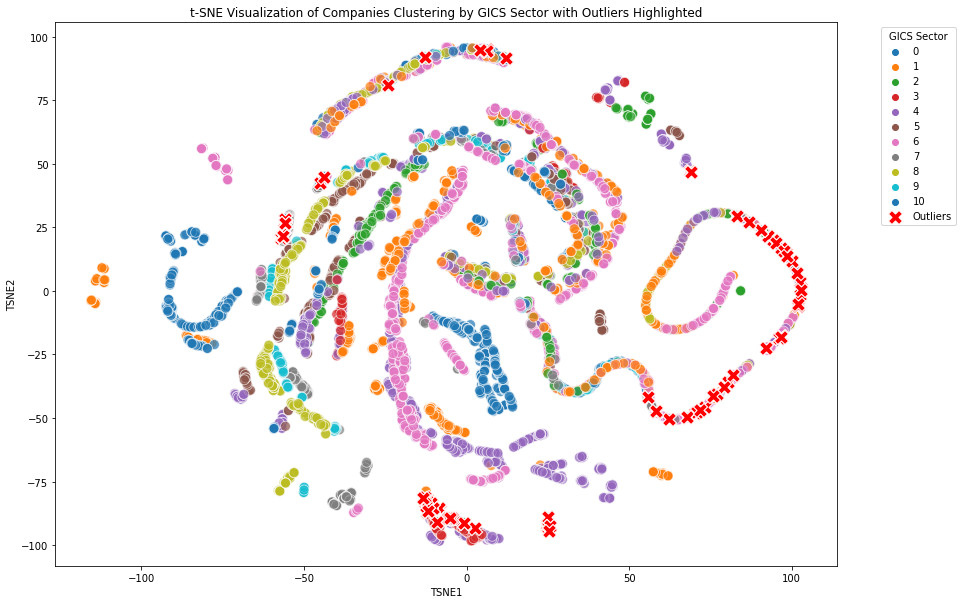

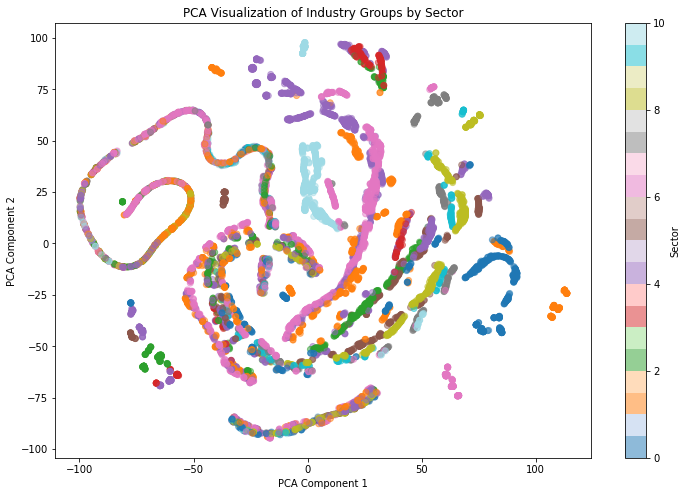

Central Companies:
                  BBTICKER  GICS_SECTOR_NAME  distance_from_centroid
GICS_SECTOR_NAME                                                    
0                      329                 0                4.474556
1                       13                 1                2.698123
2                      311                 2                3.396654
3                       57                 3               11.897859
4                       39                 4                6.783457
5                      220                 5                5.057881
6                      320                 6                4.896511
7                       97                 7               11.280331
8                      223                 8               16.777244
9                       49                 9               36.900748
10                     155                10                3.153410

Peripheral Companies:
                  BBTICKER  GICS_SECTOR_NAME  distance_from_c

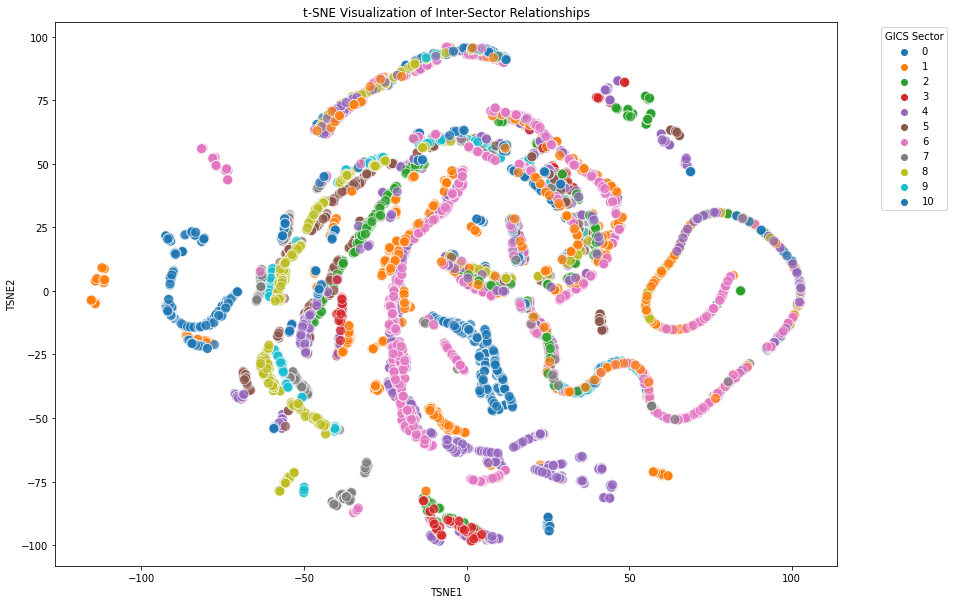

Outliers per Sector:
GICS_SECTOR_NAME
0     17
2     58
7     14
9      3
10    93
dtype: int64
Summary Statistics for Each Sector:
                       mean        std        min         max
GICS_SECTOR_NAME                                             
0                 54.898550  22.769226   4.474556  129.769321
1                 56.883691  29.203417   2.698123  119.898605
2                 54.575371  22.018337   3.396654  109.490771
3                 71.940552  19.744460  11.897859  114.085756
4                 61.426546  22.807697   6.783457  105.600755
5                 60.360925  20.836196   5.057881  102.355509
6                 54.461595  23.755999   4.896511  107.486957
7                 59.636356  18.847945  11.280331  119.534123
8                 62.846997  23.829461  16.777244  120.433904
9                 56.947364  14.176144  36.900748  100.491597
10                26.179029  25.050019   3.153410  126.431415


In [63]:
# Encoding categorical variables
label_encoders = {}
for column in ['ANALYST', 'BROKER', 'RECOMMENDATION', 'BBTICKER', 'GICS_SECTOR_NAME', 'GICS_INDUSTRY_GROUP_NAME']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Select features for t-SNE
features = ['RATING', 'TARGET_PRICE', 'GICS_SECTOR_NAME', 'GICS_INDUSTRY_GROUP_NAME']

# Fill any NaN values with the mean of the column
df[features] = df[features].fillna(df[features].mean())

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df[features])

# Add t-SNE results to the DataFrame
df['TSNE1'] = tsne_results[:, 0]
df['TSNE2'] = tsne_results[:, 1]

# Verify that the columns exist in the DataFrame
print(df.columns)

# Plot t-SNE results
plt.figure(figsize=(14, 10))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='GICS_SECTOR_NAME', data=df, palette='tab20', s=100, alpha=0.7)
plt.title('t-SNE Visualization of Industry Groups by Sector')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Compute the centroid of each cluster
centroids = df.groupby('GICS_SECTOR_NAME')[['TSNE1', 'TSNE2']].mean()

# Calculate the distance of each company from the centroid of its cluster
df['distance_from_centroid'] = df.apply(
    lambda row: np.linalg.norm(row[['TSNE1', 'TSNE2']] - centroids.loc[row['GICS_SECTOR_NAME']]), axis=1
)

# Identify outliers in each sector
outliers = []

for sector in df['GICS_SECTOR_NAME'].unique():
    sector_data = df[df['GICS_SECTOR_NAME'] == sector]
    q1 = sector_data['distance_from_centroid'].quantile(0.25)
    q3 = sector_data['distance_from_centroid'].quantile(0.75)
    iqr = q3 - q1
    threshold = q3 + 1.5 * iqr
    sector_outliers = sector_data[sector_data['distance_from_centroid'] > threshold]
    outliers.append(sector_outliers)

outliers_df = pd.concat(outliers)

# Plot t-SNE results with companies color-coded by their GICS sector and outliers highlighted
plt.figure(figsize=(14, 10))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='GICS_SECTOR_NAME', data=df, palette='tab10', s=100, alpha=0.7)
sns.scatterplot(x='TSNE1', y='TSNE2', data=outliers_df, marker='X', s=200, color='red', label='Outliers')
plt.title('t-SNE Visualization of Companies Clustering by GICS Sector with Outliers Highlighted')
plt.legend(title='GICS Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Perform PCA for additional perspective
pca = PCA(n_components=2, random_state=42)
pca_results = pca.fit_transform(df[['TSNE1', 'TSNE2']])

# Plot PCA results
plt.figure(figsize=(12, 8))
plt.scatter(pca_results[:, 0], pca_results[:, 1], c=df['GICS_SECTOR_NAME'], cmap='tab20', alpha=0.5)
plt.title('PCA Visualization of Industry Groups by Sector')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Sector')
plt.show()

# Central and Peripheral Companies
central_companies = df.groupby('GICS_SECTOR_NAME').apply(lambda x: x.loc[x['distance_from_centroid'].idxmin()])
peripheral_companies = df.groupby('GICS_SECTOR_NAME').apply(lambda x: x.loc[x['distance_from_centroid'].idxmax()])

print("Central Companies:")
print(central_companies[['BBTICKER', 'GICS_SECTOR_NAME', 'distance_from_centroid']])

print("\nPeripheral Companies:")
print(peripheral_companies[['BBTICKER', 'GICS_SECTOR_NAME', 'distance_from_centroid']])

# Inter-Sector Relationships
plt.figure(figsize=(14, 10))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='GICS_SECTOR_NAME', data=df, palette='tab10', s=100, alpha=0.7)
plt.title('t-SNE Visualization of Inter-Sector Relationships')
plt.legend(title='GICS Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Characteristics of Outliers
outlier_summary = outliers_df.groupby('GICS_SECTOR_NAME').size()
print("Outliers per Sector:")
print(outlier_summary)

# Summary Statistics for Each Sector
summary_stats = df.groupby('GICS_SECTOR_NAME')['distance_from_centroid'].agg(['mean', 'std', 'min', 'max'])
print("Summary Statistics for Each Sector:")
print(summary_stats)
